#Problem 1
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**
1. vote: Party choice - Conservative or Labour [Target Variable].
2. age: Age in years.
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5 (1 being the lowest rating, 5 being the highest rating).
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader Tony Blair, 1 to 5.
6. Hague: Assessment of the Conservative leader William Hague, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment (A person who is opposed to increasing the powers of the European Union - against European integration of the UK)
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: Female or male.

In [ ]:
#Importing the necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed

In [ ]:
#Read dataset
df = pd.read_excel('Election_Data.xlsx')

In [ ]:
#Head of the dataset
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
#Dropping the Unnamed Serial number column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
#Shape of the dataset
df.shape

(1525, 9)

The dataset has 9 features with 1525 data points

In [ ]:
#Data type
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

All features have correct datatypes

In [ ]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


9 Features:-
 7 numerical type & 2 object type, 1525 records, no null values

In [ ]:
#Checking Null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

No null values in the dataset

In [ ]:
#Checking for duplicate
df.duplicated().sum()

8

There are 8 duplicates in the dataset.

In [ ]:
#Dropping the duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
df.reset_index(drop = True, inplace = True)

The duplicate values have been removed

In [ ]:
#Creating categorical & Numeric dataset from it
cat = []
num = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)

In [ ]:
cat

['vote', 'gender']

In [ ]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [ ]:
# Five point summary with Skewness
round(df.describe().T.join(pd.DataFrame(df[num].skew(), columns = ['skew']), how = 'right'), 2)

,count,mean,std,min,25%,50%,75%,max,skew
age,1517.0,54.24,15.70,24.0,41.0,53.0,67.0,93.0,0.14
economic.cond.national,1517.0,3.25,0.88,1.0,3.0,3.0,4.0,5.0,-0.24
economic.cond.household,1517.0,3.14,0.93,1.0,3.0,3.0,4.0,5.0,-0.14
Blair,1517.0,3.34,1.17,1.0,2.0,4.0,4.0,5.0,-0.54
Hague,1517.0,2.75,1.23,1.0,2.0,2.0,4.0,5.0,0.15
Europe,1517.0,6.74,3.30,1.0,4.0,6.0,10.0,11.0,-0.14
political.knowledge,1517.0,1.54,1.08,0.0,0.0,2.0,2.0,3.0,-0.42




*   Data quality: No instances of "bad" or corrupt data were found.


*   Economic condition ratings: Both national and household levels lean positively towards Tony Blair (ratings >3), indicating public approval of his economic stewardship.
*   Leadership perception: William Hague's rating falls below the neutral score, signifying less public confidence in his leadership.

*   Skewness: All variables show skewness values within |0.5|, suggesting minimal data asymmetry, implying data can be treated as essentially unskewed







In [ ]:
df[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808



*    Categorical variables: Two levels present - Labour and gender.
*   Labour frequency: Higher representation with 1057 occurrences out of 1517 in the target variable.
*   Gender frequency: Females are more prevalent with 808 out of 1517 occurrences

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers.

Interpret the inferences for each  Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.


For Univariate and bivariate analysis: The survey rating variables (economic.cond.national, economic.cond.household, Blair, Hague, Europe, political.knowledge) are treated as ordinal categorical or discrete numerical variables, as required.

In [ ]:
ord = []
for i in num:
  if i != 'age':
    ord.append(i)
print(ord)

['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


###Univariate Analysis

Age Description
count    1517.00
mean       54.24
std        15.70
min        24.00
25%        41.00
50%        53.00
75%        67.00
max        93.00
Name: age, dtype: float64
Skewness = 0.14


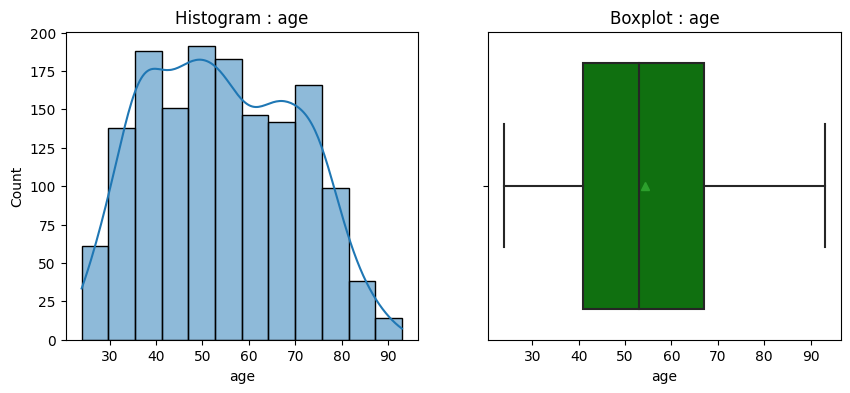

In [ ]:
print('Age Description')
print(round(df['age'].describe(), 2))
print('Skewness =', round(df['age'].skew(), 2))

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Histogram : age')
sns.histplot(df['age'], kde=True, bins = 12);

plt.subplot(1,2,2)
plt.title('Boxplot : age')
sns.boxplot(x = 'age', data = df, color='green', showmeans=True);

Age, ranging from 24 to 93, has a slight right skew but can be considered normally distributed for analysis due to minimal skewness and a wavy peak.

Its mean (54.24) slightly exceeds the median (53), indicating this minor skewness. No outliers are present

economic.cond.national %age Count
3    39.82
4    35.46
2    16.88
5     5.41
1     2.44
Name: economic.cond.national, dtype: float64
Average Score = 3.25


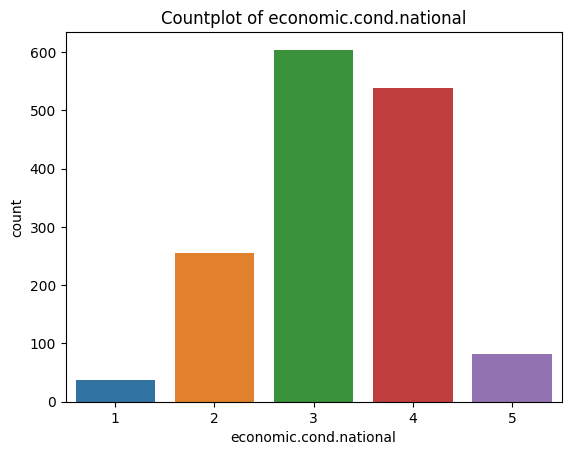



economic.cond.household %age Count
3    42.52
4    28.68
2    18.46
5     6.06
1     4.28
Name: economic.cond.household, dtype: float64
Average Score = 3.14


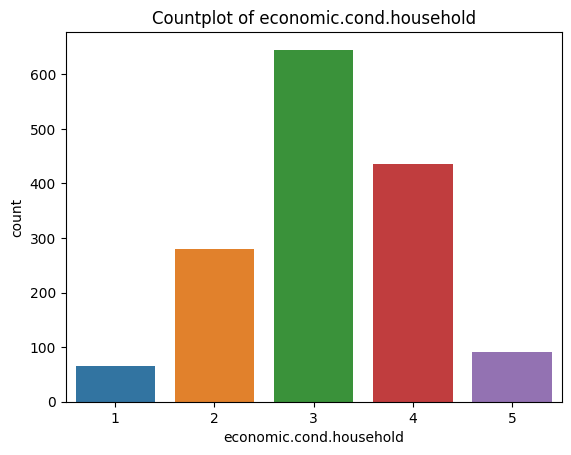



Blair %age Count
4    54.91
2    28.61
5    10.02
1     6.39
3     0.07
Name: Blair, dtype: float64
Average Score = 3.34


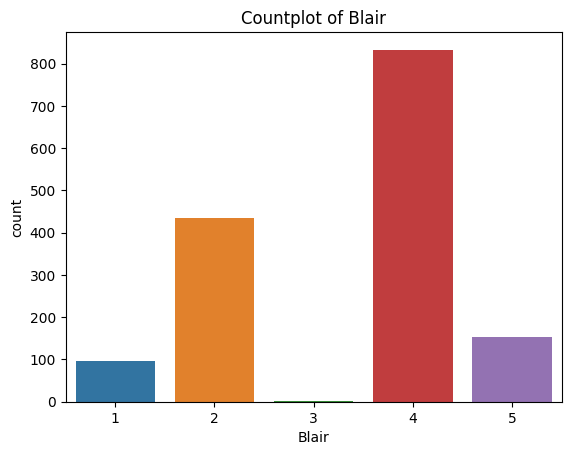



Hague %age Count
2    40.67
4    36.72
1    15.36
5     4.81
3     2.44
Name: Hague, dtype: float64
Average Score = 2.75


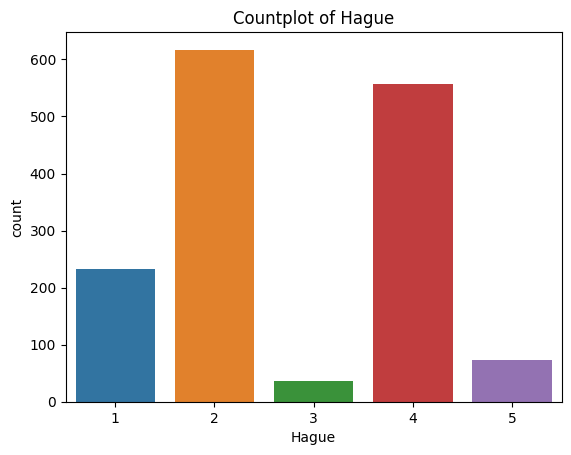



Europe %age Count
11    22.28
6     13.65
3      8.44
4      8.31
5      8.11
9      7.32
8      7.32
1      7.19
10     6.66
7      5.67
2      5.08
Name: Europe, dtype: float64
Average Score = 6.74


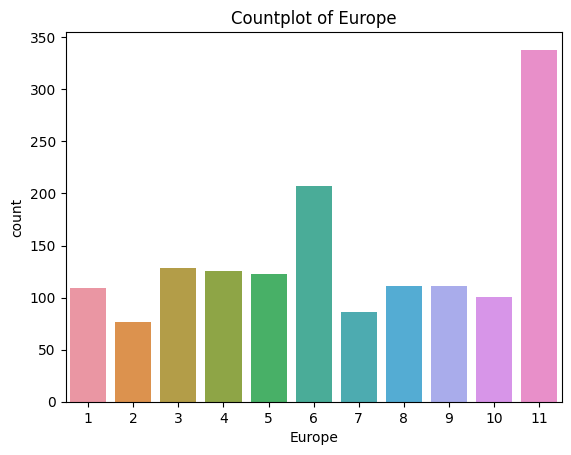



political.knowledge %age Count
2    51.15
0    29.93
3    16.41
1     2.50
Name: political.knowledge, dtype: float64
Average Score = 1.54


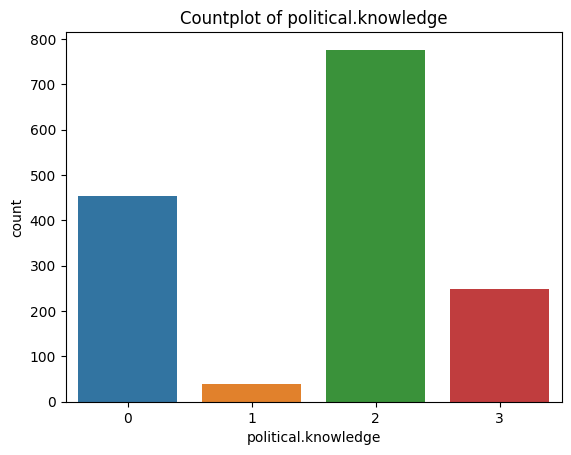

In [ ]:
for i in ord:
  print(i, '%age Count')
  print(round(df[i].value_counts(normalize = True)*100,2))
  print('Average Score =', round(df[i].mean(),2))

  plt.title('Countplot of ' + str(i))
  sns.countplot(x = df[i]);
  plt.show()
  print('\n')



*   National economic condition received a rating of 3 or 4 from ~75% respondents, average score: 3.25.
*  Household economic condition rated 3 or 4 by ~70% of individuals, average score: 3.14.
*  Blair's favorable rating by ~65% respondents, average score: 3.34, suggests satisfaction with Labour party.
*  Hague rated poorly by ~55% respondents, average score: 2.75.
Average score of 6.74 indicates majority leaning towards Brexit, with 22% strongly favoring.
*  30% respondents unaware of their party's stance on European Integration, while 50% are well-informed.



vote %age Count
Labour          69.68
Conservative    30.32
Name: vote, dtype: float64


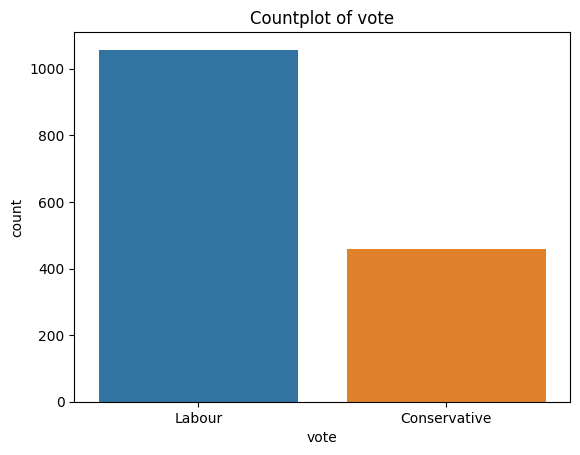

gender %age Count
female    53.26
male      46.74
Name: gender, dtype: float64


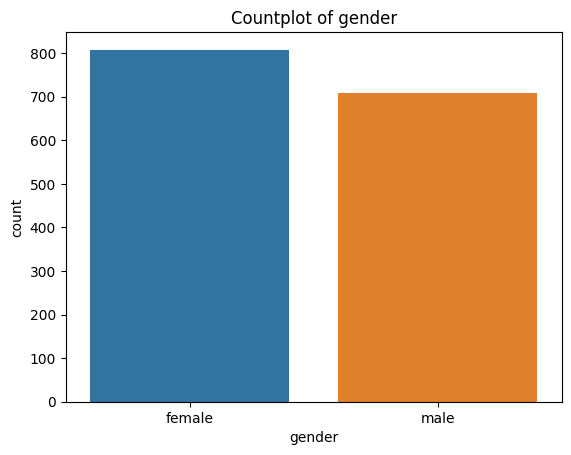

In [ ]:
for i in cat:
  print(i, '%age Count')
  print(round(df[i].value_counts(normalize = True)*100,2))

  plt.title('Countplot of ' + str(i))
  sns.countplot(x = df[i]);
  plt.show()



*   Survey of 1500 individuals shows ~70% support for Labour Party, ~30% for Conservative Party.
*   Slight class imbalance noted in target variable, but no drastic underrepresentation of Conservative class. Over/under sampling techniques not required



###Bivariate Analysis

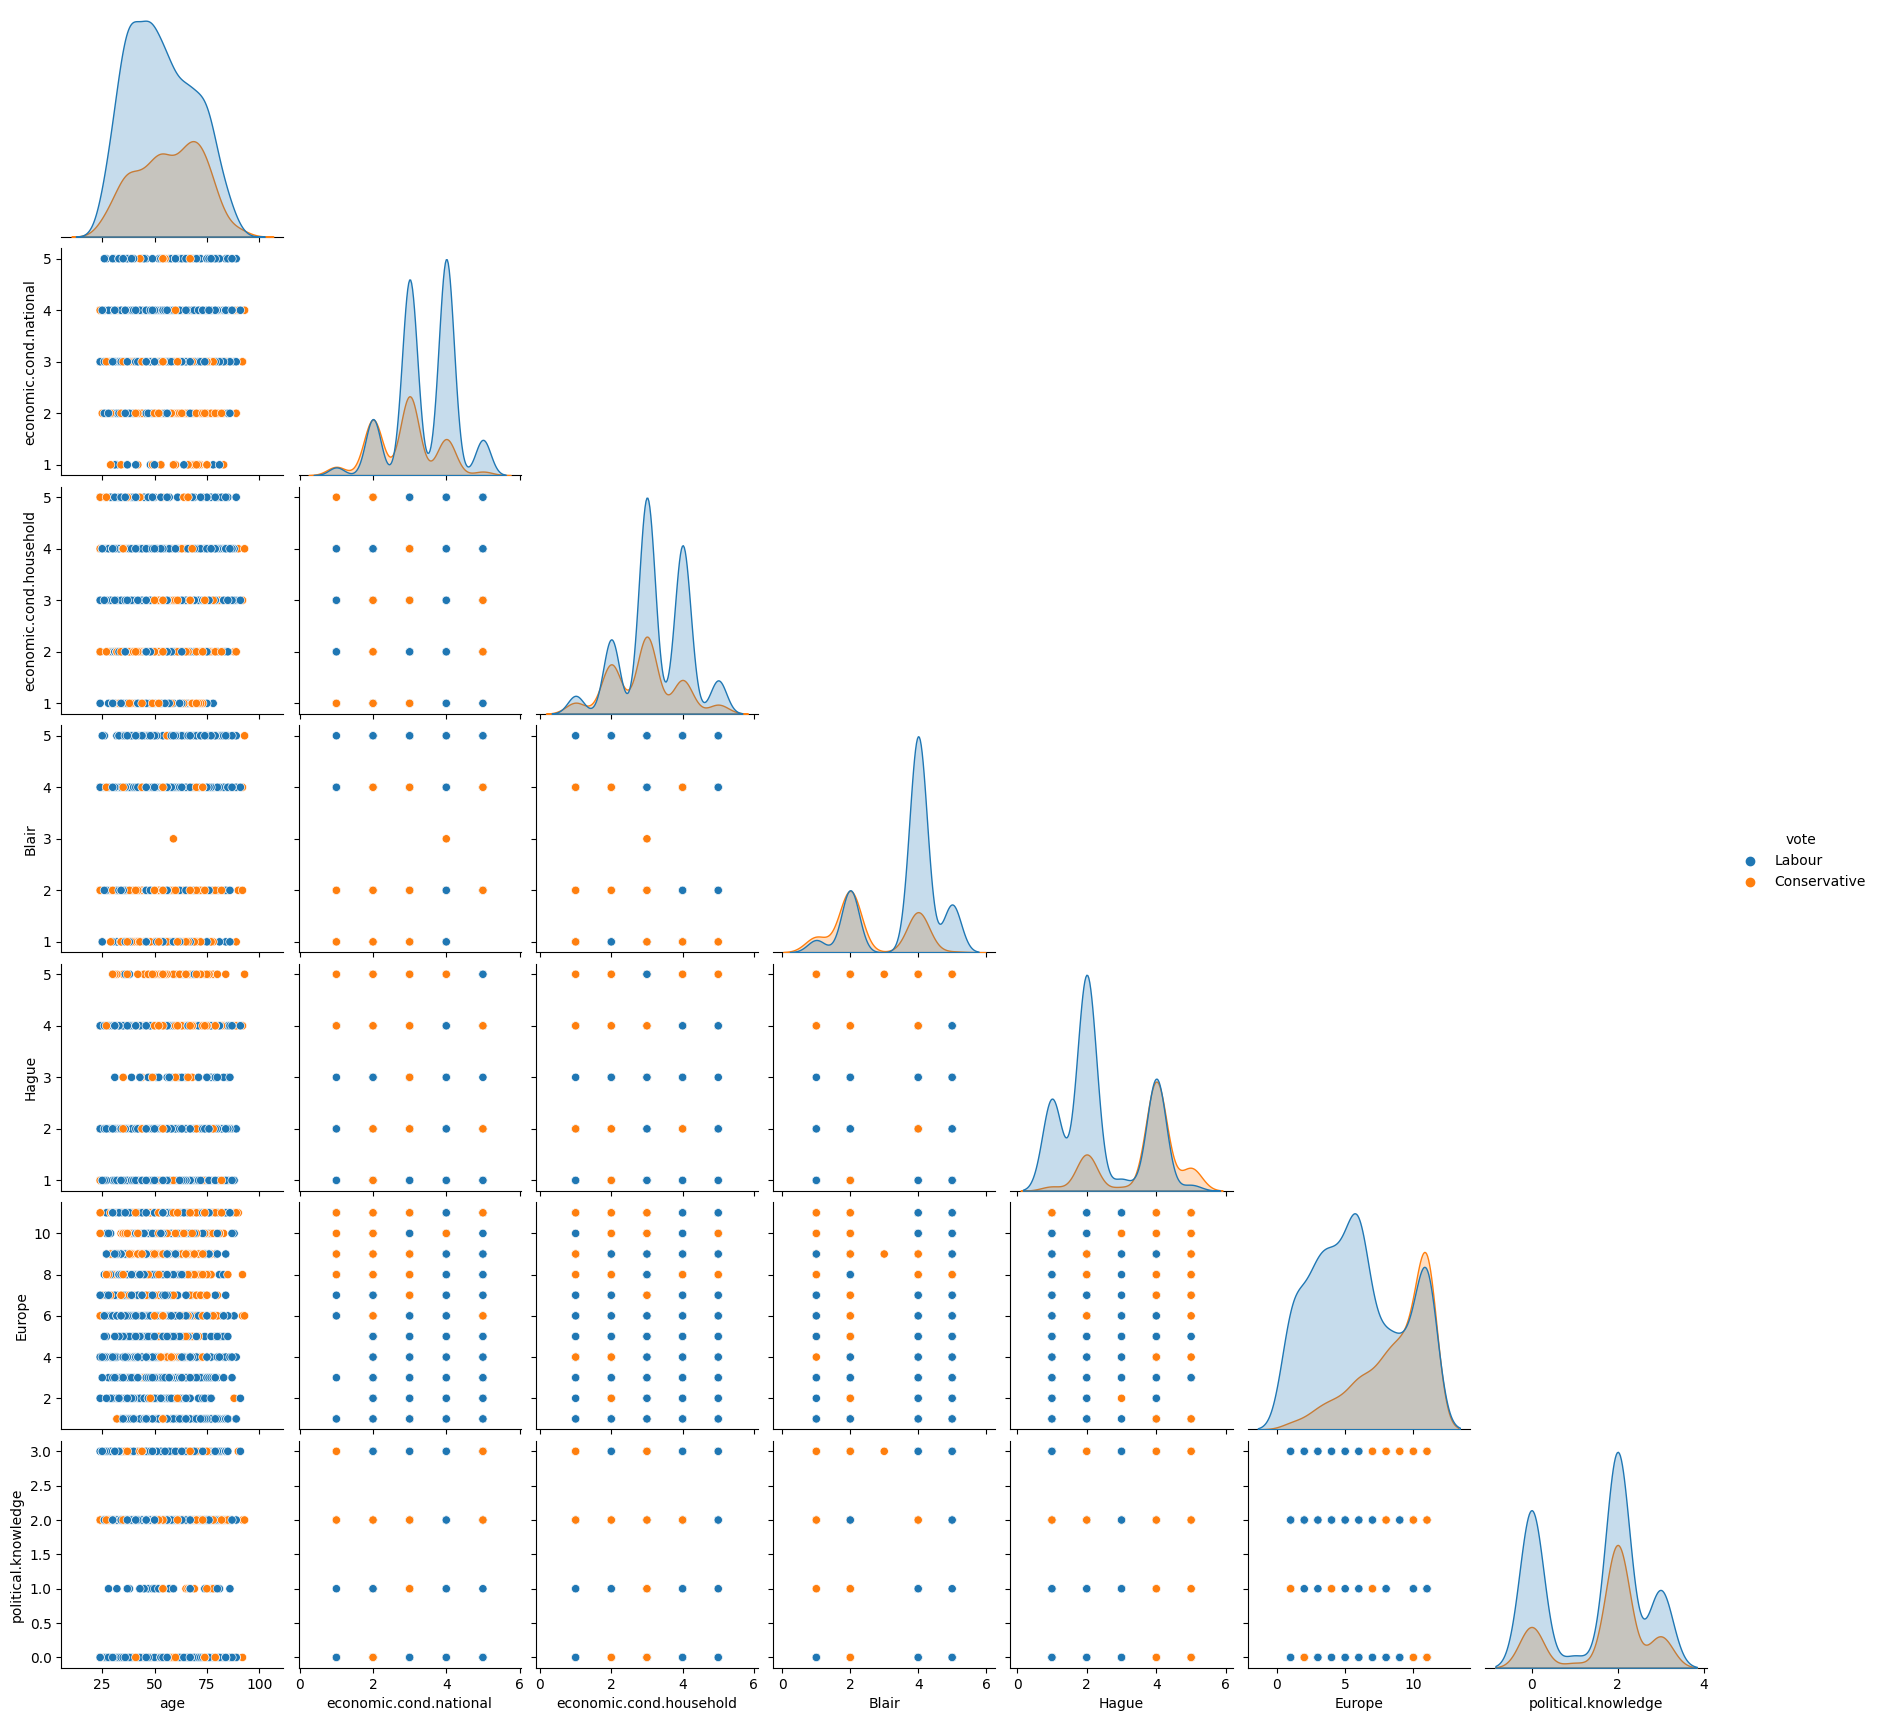

In [ ]:
sns.pairplot(df, hue="vote", corner=True)

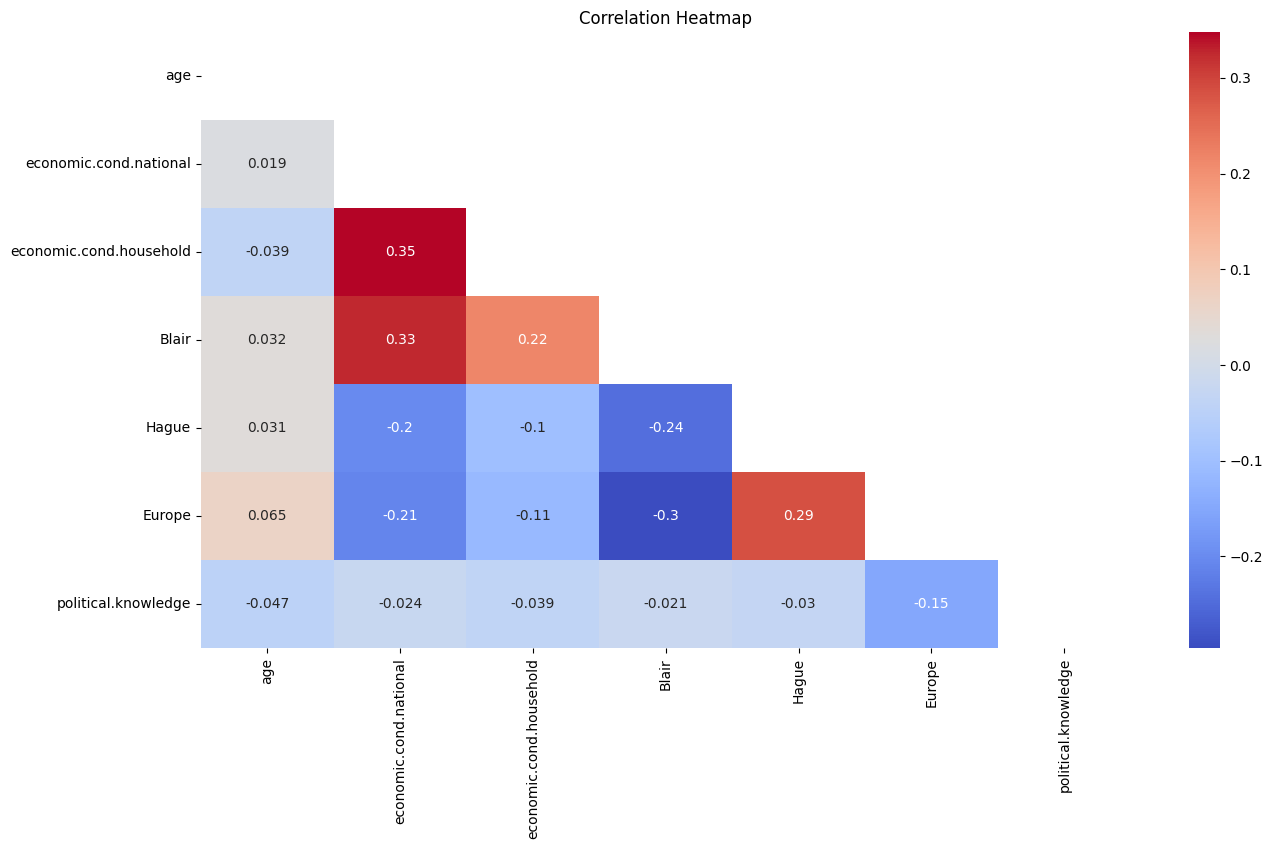

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.title('Correlation Heatmap')

mask = np.triu(np.ones_like(df.corr()))
%matplotlib inline
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm",mask=mask, annot_kws={'size': 10})
plt.show()



*   Mild positive correlation exists between national and household economic condition ratings, and also with Labour Party leader Tony Blair's ratings. Conversely, slight negative correlation with Conservative Party leader William Hague's ratings, suggesting general satisfaction with current economy and preference for Labour.
*   Mild negative correlation between Brexit sentiments and Blair's ratings, mild positive correlation with Hague's ratings, suggesting Brexit supporters are discontent with Labour's EU stance and prefer Conservatives.
*   Blair and Hague's ratings exhibit weak negative correlation, as expected from opposing election candidates.



gender,female,male
vote,,
Conservative,31.81,28.63
Labour,68.19,71.37


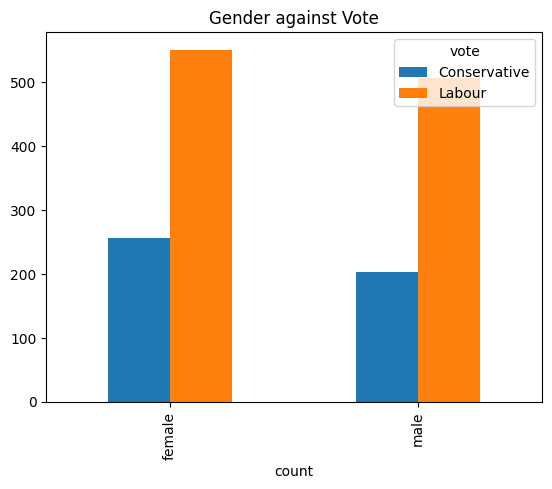

In [ ]:
pd.crosstab(df['gender'], df['vote']).plot(kind = 'bar')
plt.title('Gender against Vote')
plt.xlabel('count');
round(pd.crosstab(df['vote'], df['gender'], normalize = 'columns') * 100, 2)



*   Gender appears to minimally impact voting trends, with a slightly higher proportion of females voting for the conservatives compared to males



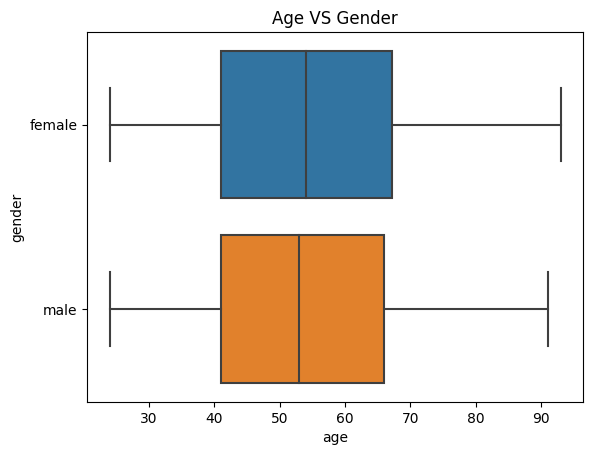

In [ ]:
plt.title('Age VS Gender');
sns.boxplot(data = df, y = 'gender', x = 'age');


*   Boxplots are alike, suggesting the sampling for analysis is unbiased and random, ensuring data reliability




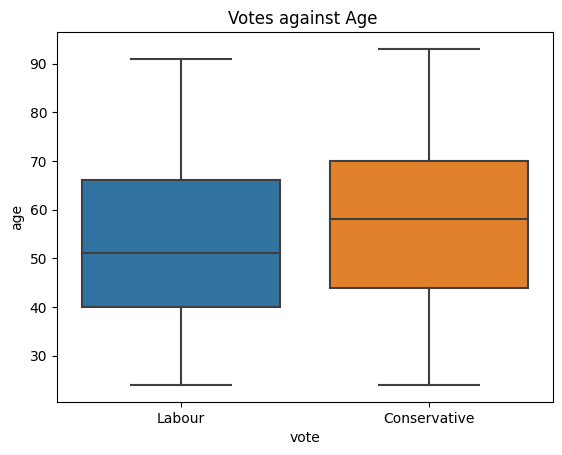

In [ ]:
plt.title('Votes against Age ');
sns.boxplot(data = df, y = 'age', x = 'vote');



*   Younger to middle-aged voters (under 50) favor the Labour Party, as shown by median and probability distribution. Conversely, voters over 60 tend to prefer the Conservative Party




economic.cond.national,1,2,3,4,5
vote,,,,,
Conservative,56.76,54.69,32.95,16.91,10.98
Labour,43.24,45.31,67.05,83.09,89.02


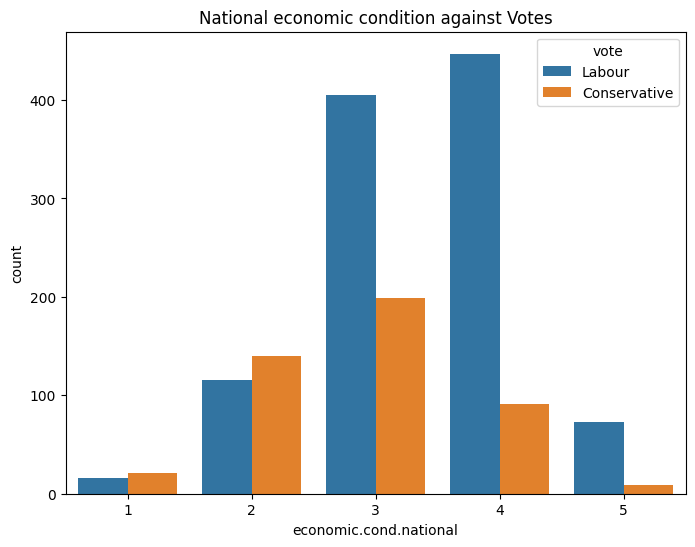

In [ ]:
plt.figure(figsize = [8, 6])
plt.title('National economic condition against Votes');
sns.countplot(data = df, x = 'economic.cond.national', hue = 'vote');
round(pd.crosstab(df['vote'], df['economic.cond.national'], normalize = 'columns') * 100, 2)



*  The plot confirms Labour's majority vote and highlights that voters rating national economic conditions as average or above lean towards Labour. This echoes the previously observed positive correlation with Labour leader's ratings


economic.cond.household,1,2,3,4,5
vote,,,,,
Conservative,43.08,45.0,30.54,19.77,25.0
Labour,56.92,55.0,69.46,80.23,75.0


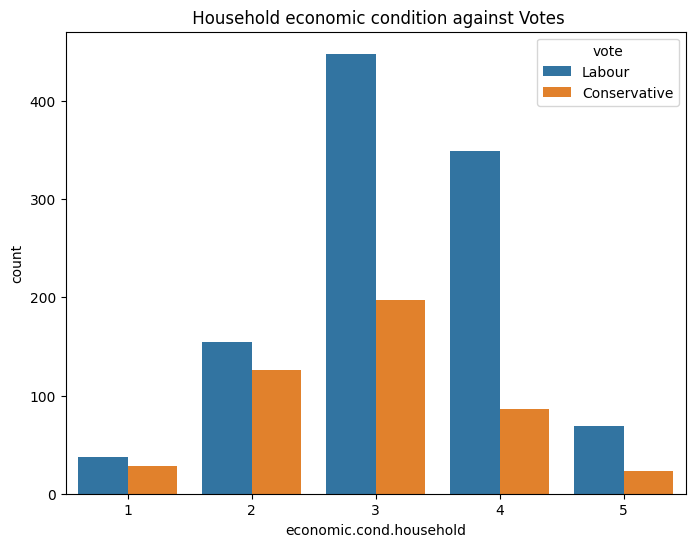

In [ ]:
plt.figure(figsize = [8, 6])
plt.title(' Household economic condition against Votes');
sns.countplot(data = df, x = 'economic.cond.household', hue = 'vote');
round(pd.crosstab(df['vote'], df['economic.cond.household'], normalize = 'columns') * 100, 2)

*  Majority of voters rating their household economic conditions as average or above prefer Labour. This noticeable vote difference for these ratings between Labour and Conservatives reinforces Labour's appeal.





Blair,1,2,3,4,5
vote,,,,,
Conservative,60.82,55.3,100.0,18.85,1.97
Labour,39.18,44.7,0.0,81.15,98.03


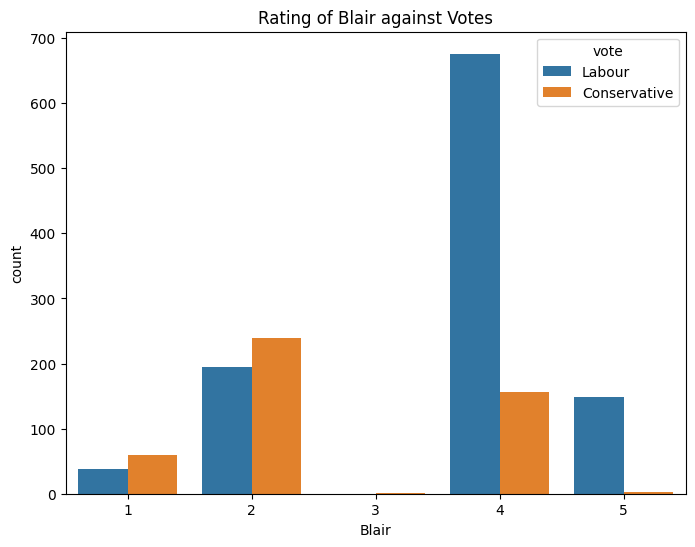

In [ ]:
plt.figure(figsize = [8, 6])
plt.title('Rating of Blair against Votes');
sns.countplot(data = df, x = 'Blair', hue = 'vote');
round(pd.crosstab(df['vote'], df['Blair'], normalize = 'columns') * 100, 2)

*  Voters giving high ratings to Tony Blair typically support Labour, while those rating him low typically vote Conservative, as expected.





Hague,1,2,3,4,5
vote,,,,,
Conservative,4.72,15.4,24.32,51.35,80.82
Labour,95.28,84.6,75.68,48.65,19.18


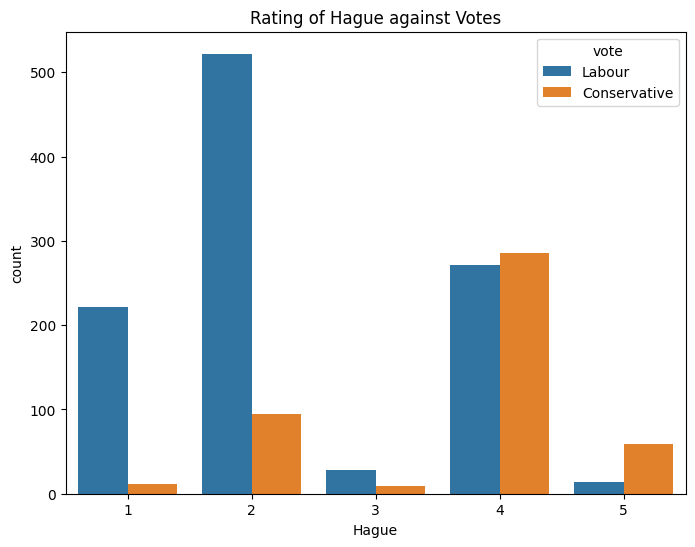

In [ ]:
plt.figure(figsize = [8, 6])
plt.title('Rating of Hague against Votes');
sns.countplot(data = df, x = 'Hague', hue = 'vote');
round(pd.crosstab(df['vote'], df['Hague'], normalize = 'columns') * 100, 2)

*  Voters who rated William Hague highly tend to vote Conservative, while those giving him low ratings generally support Labour.





Europe,1,2,3,4,5,6,7,8,9,10,11
vote,,,,,,,,,,,
Conservative,4.59,7.79,10.94,14.29,16.26,16.91,37.21,43.24,50.45,53.47,50.89
Labour,95.41,92.21,89.06,85.71,83.74,83.09,62.79,56.76,49.55,46.53,49.11


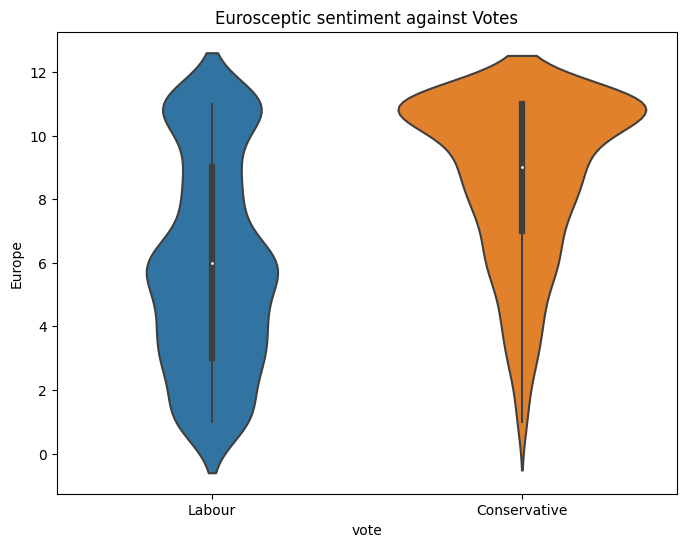

In [ ]:
plt.figure(figsize = [8, 6])
plt.title('Eurosceptic sentiment against Votes');
sns.violinplot(data = df, y = 'Europe', x = 'vote');
round(pd.crosstab(df['vote'], df['Europe'], normalize = 'columns') * 100, 2)

*  Voters desiring UK's EU membership favor Labour, while eurosceptics divide their votes between both Labour and Conservative parties


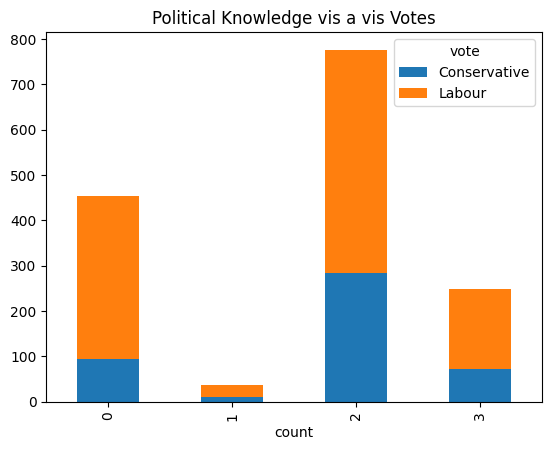

In [ ]:
pk = round(pd.crosstab(df['political.knowledge'], df['vote']), 2)
pk.plot.bar(stacked = True)
plt.xlabel('count')
plt.title('Political Knowledge vis a vis Votes');

*  Both politically unaware individuals and those with strong knowledge of their parties' stance on Europe largely vote for Labour

###Outliers

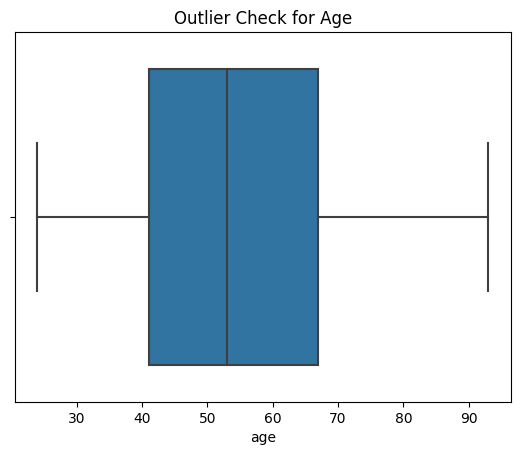

In [ ]:
plt.title('Outlier Check for Age')
sns.boxplot(data = df, x = 'age');

*  Considering only the 'age' variable for outliers, as other features are ordinal, no outliers were detected

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?, Data Split: Split the data into train and test (70:30) . The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.


One-hot encoding is applied solely to the 'gender' variable, dropping the dummy variable, as all other independent features are numerical

In [ ]:
df = pd.get_dummies(df, columns = ['gender'], drop_first = True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


Numerical variables are scaled to avoid inaccuracies in distance-based algorithms like KNN. Though tree-based algorithms and other techniques used in this study are minimally affected by scaling, it's still performed for accuracy

In [ ]:
a = round(df[num].describe().T, 2)
a['range'] = a['max'] - a['min']
a[['range', 'std']]

,range,std
age,69.0,15.70
economic.cond.national,4.0,0.88
economic.cond.household,4.0,0.93
Blair,4.0,1.17
Hague,4.0,1.23
Europe,10.0,3.30
political.knowledge,3.0,1.08


Observing the table, it is evident that the 'age' variable has a larger scale compared to the other rating variables.

Therefore, the Min-Max scaling method is chosen for scaling, considering the presence of mostly ordinal and encoded variables in the dataset.





In [ ]:
scaler = MinMaxScaler().fit(df[num])
data_minmax = scaler.transform(df[num])
df[num] = pd.DataFrame(data_minmax, columns = df[num].columns)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0
1,Labour,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1
2,Labour,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1
3,Labour,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0
4,Labour,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1


In [ ]:
X = df.drop('vote', axis = 1)
Y = df['vote']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [ ]:
X_train.shape

(1061, 8)

In [ ]:
Y_train.shape

(1061,)

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis).

Interpret the inferences of both models.

Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


####Logistic Regression

In [ ]:
lr = LogisticRegression(solver  = 'lbfgs') #default solver
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_train_lr = lr.predict(X_train)
Y_test_lr = lr.predict(X_test)

**Model Evaluation - Train**

Considering the skewed dataset and the costly nature of both type I and type II errors, the evaluation of model performance should prioritize the F1 score for both classes, in addition to accuracy.





In [ ]:
print(classification_report(Y_train, Y_train_lr))

              precision    recall  f1-score   support

Conservative       0.76      0.63      0.69       307
      Labour       0.86      0.92      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



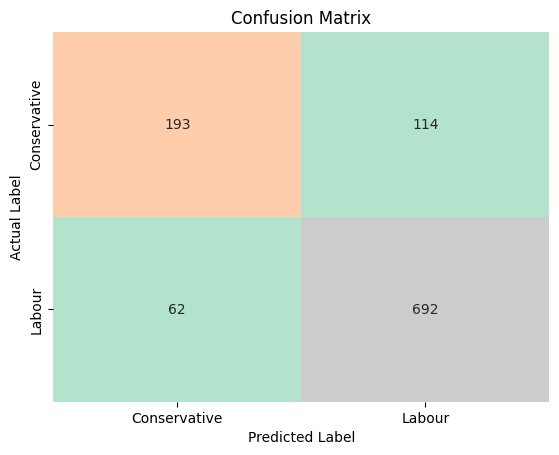

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_lr), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


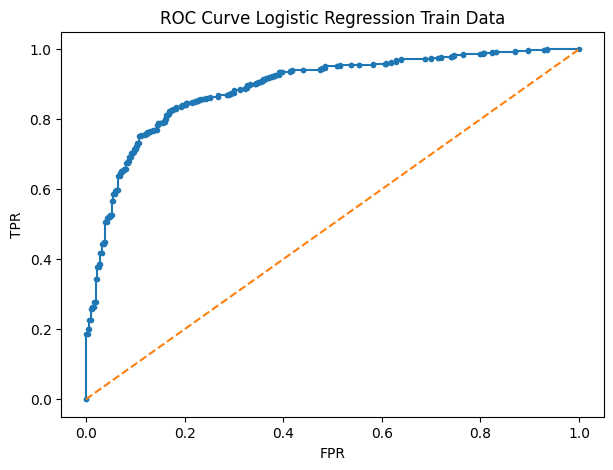

In [ ]:
Y_train_predict_prob = lr.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_lr = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_lr, 2))
fpr_train_lr, tpr_train_lr, thresholds = roc_curve(Y_train, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Logistic Regression Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_lr, tpr_train_lr, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_lr))

              precision    recall  f1-score   support

Conservative       0.76      0.71      0.73       153
      Labour       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



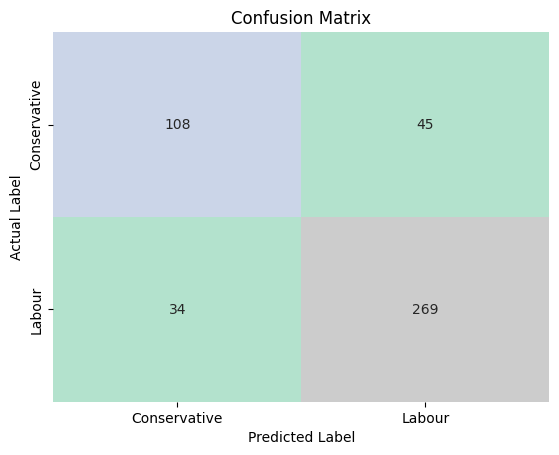

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_lr), annot = True, fmt = 'd', cmap = 'Pastel2',cbar = False, xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.88


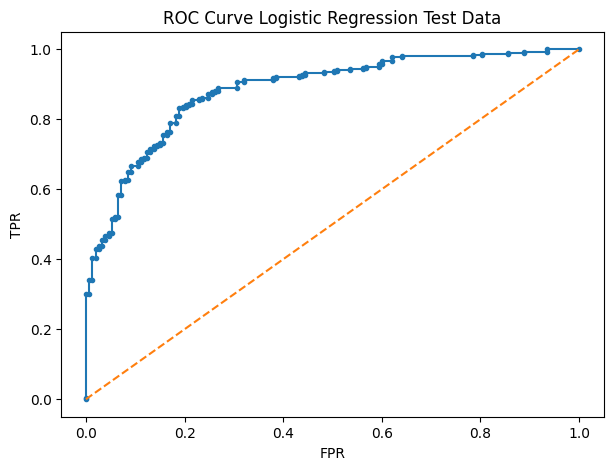

In [ ]:
Y_test_predict_prob = lr.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_lr = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_lr, 2))
fpr_test_lr, tpr_test_lr, thresholds = roc_curve(Y_test, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Logistic Regression Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_lr, tpr_test_lr, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Feature Importance**

Since the the data is scaled, the coefficients of the Logit Function will give the feature importance.

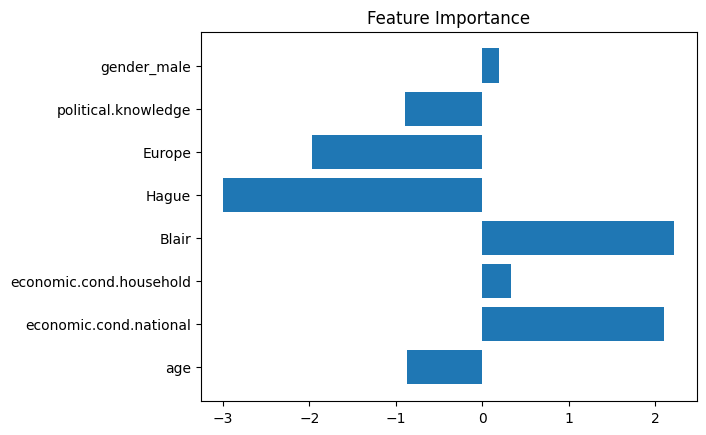

In [ ]:
plt.title('Feature Importance')
plt.barh(X_train.columns, lr.coef_[0]);

*  The model's precision, recall, accuracy, and AUC on the training and testing data are comparable and high, indicating no overfitting or underfitting. The model is suitable for making predictions.
* The model demonstrates better performance in predicting the majority class, while its performance for the minority class is relatively lower.
* The four most influential features for classification are the ratings of Hague and Blair, ratings of national economic conditions, and Eurosceptic sentiment

####LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
Y_train_lda = lda.predict(X_train)
Y_test_lda = lda.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_lda))

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



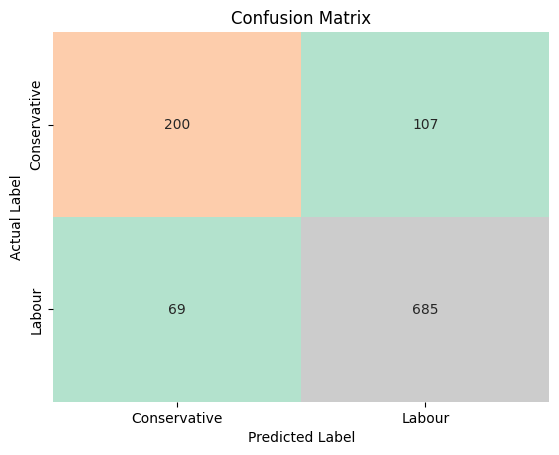

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_lda), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


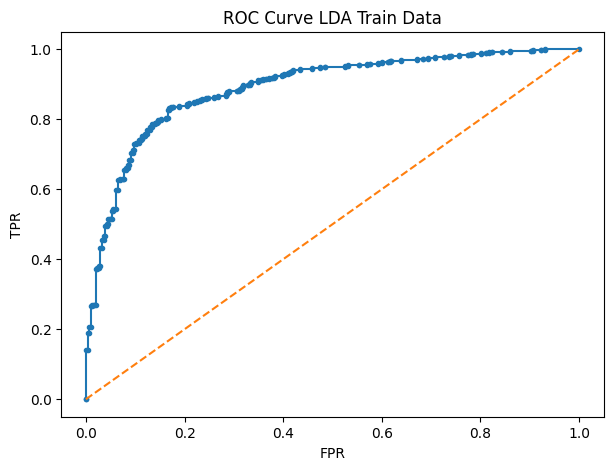

In [ ]:
Y_train_predict_prob = lda.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_lda = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_lda, 2))
fpr_train_lda, tpr_train_lda, thresholds = roc_curve(Y_train, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve LDA Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_lda, tpr_train_lda, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_lda))

              precision    recall  f1-score   support

Conservative       0.77      0.73      0.74       153
      Labour       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



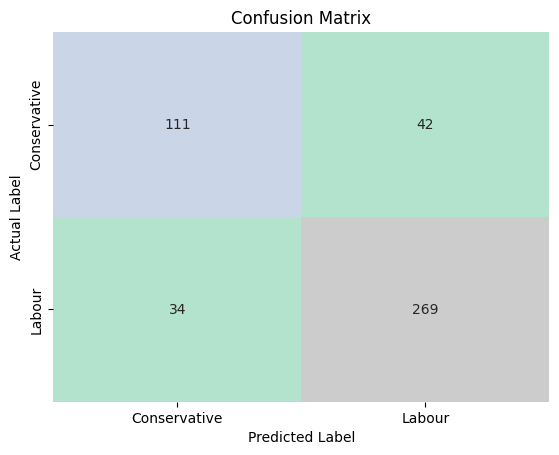

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_lda), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


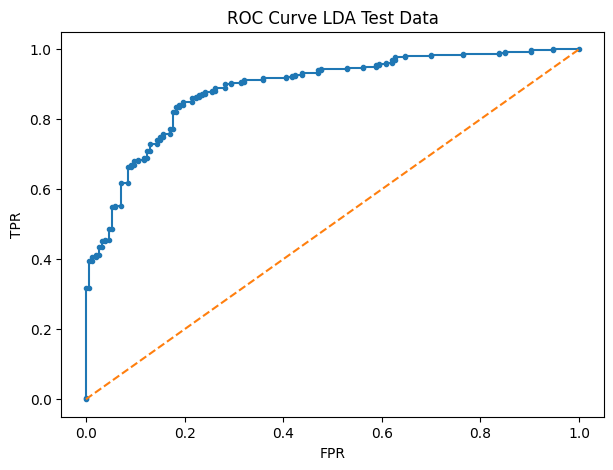

In [ ]:
Y_test_predict_prob = lda.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_lda = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_lda, 2))
fpr_test_lda, tpr_test_lda, thresholds = roc_curve(Y_test, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve LDA Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_lda, tpr_test_lda, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Feature Importance**

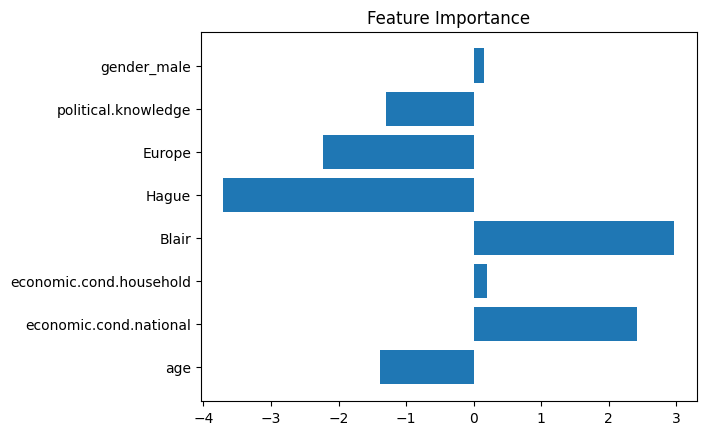

In [ ]:
plt.title('Feature Importance')
plt.barh(X_train.columns, lda.coef_[0]);

*  The precision, recall, accuracy, and AUC of the model on both training and testing data are high and consistent, indicating no overfitting or underfitting. The model is suitable for making predictions.
*  The model's performance is similar to that of a Logistic Regression model, with better predictions for the majority class and relatively poorer performance for the minority class.
*  According to the LDA model, the four most important features for classification remain the same: ratings of Hague and Blair, ratings of national economic conditions, and Eurosceptic sentiment

1.5) Apply KNN Model and Naïve Bayes Model.

Interpret the inferences of each model.

Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


####KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
Y_train_knn = knn.predict(X_train)
Y_test_knn = knn.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_knn))

              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       307
      Labour       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



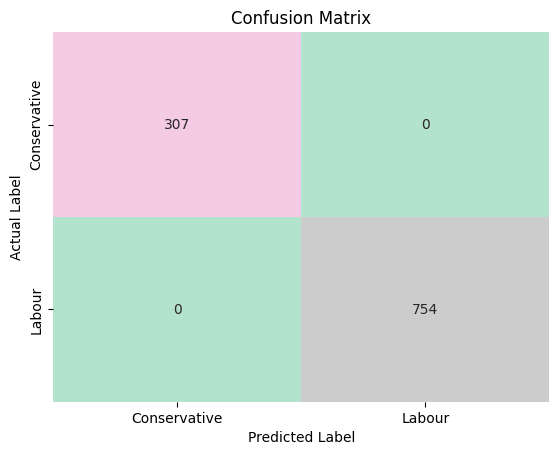

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_knn), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 1.0


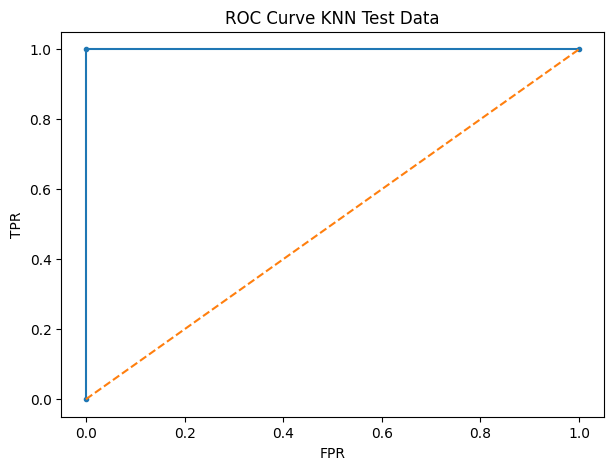

In [ ]:
Y_train_predict_prob = knn.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_knn = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_knn, 2))
fpr_train_knn, tpr_train_knn, thresholds = roc_curve(Y_train, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve KNN Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_knn, tpr_train_knn, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_knn))

              precision    recall  f1-score   support

Conservative       0.74      0.66      0.70       153
      Labour       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.80      0.81      0.80       456



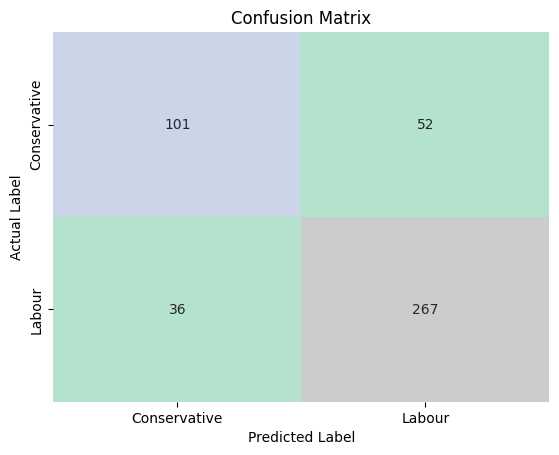

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_knn), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.87


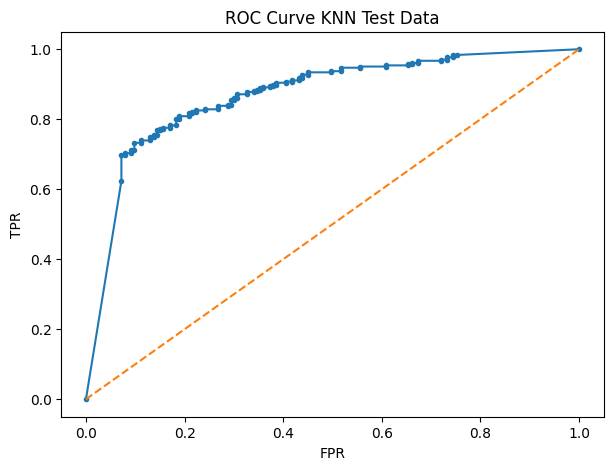

In [ ]:
Y_test_predict_prob = knn.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_knn = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_knn, 2))
fpr_test_knn, tpr_test_knn, thresholds = roc_curve(Y_test, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve KNN Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_knn, tpr_test_knn, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

*  The model exhibits overfitting as it achieves perfect predictions, such as 100% accuracy and other performance metrics, on the training data. However, it struggles to perform similarly well on the test data, resulting in a notable difference in accuracy (>10%).

####Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_train_gnb = gnb.predict(X_train)
Y_test_gnb = gnb.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_gnb))

              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



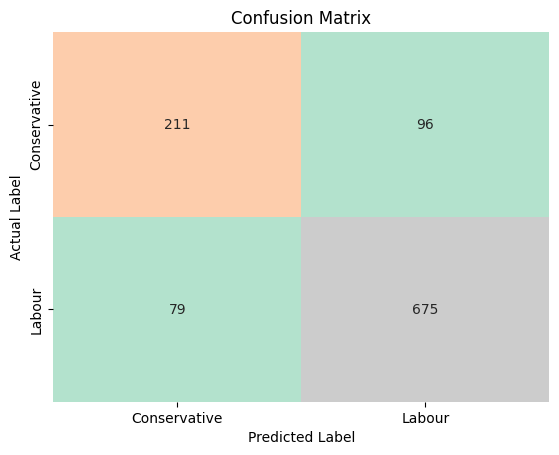

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_gnb), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


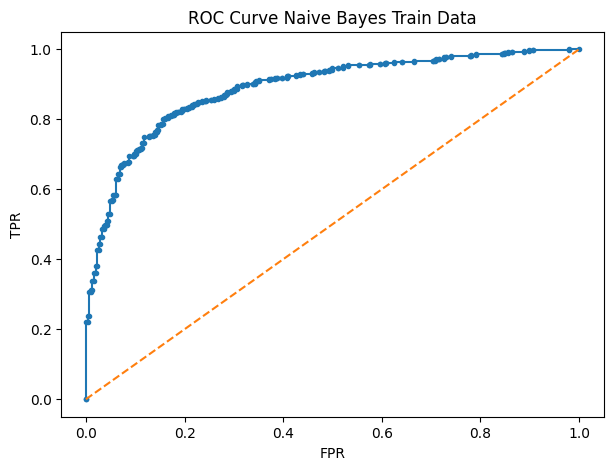

In [ ]:
Y_train_predict_prob = gnb.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_gnb = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_gnb, 2))
fpr_train_gnb, tpr_train_gnb, thresholds = roc_curve(Y_train, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Naive Bayes Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_gnb, tpr_train_gnb, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_gnb))

              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



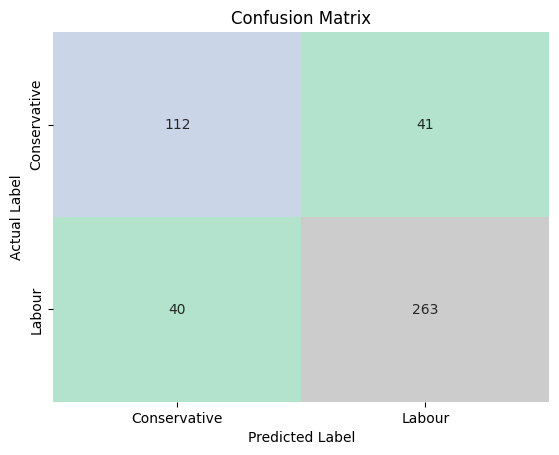

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_gnb), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Conservative', 'Labour'], yticklabels = ['Conservative', 'Labour'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.88


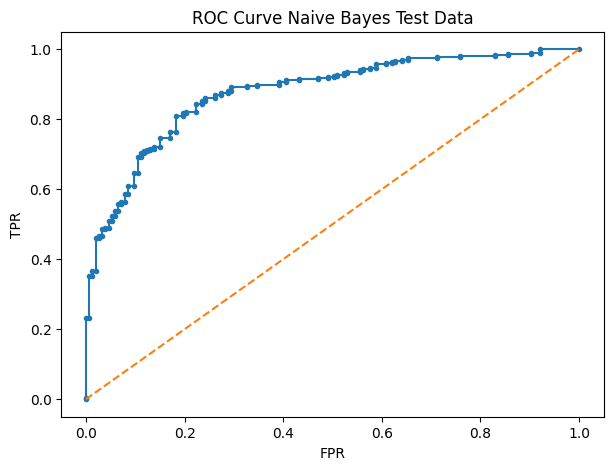

In [ ]:
Y_test_predict_prob = gnb.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_gnb = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_gnb, 2))
fpr_test_gnb, tpr_test_gnb, thresholds = roc_curve(Y_test, probs, pos_label = 'Labour')

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Naive Bayes Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_gnb, tpr_test_gnb, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

  *  The precision, recall, accuracy, and AUC of the model on both the training and testing data are high and consistent, indicating no overfitting or underfitting. The model is suitable for making predictions.

  *  The model's performance is comparable to Logistic Regression and LDA models, showing better predictions for the majority class but relatively poorer performance for the minority class

1.6) Model Tuning  , Bagging  and Boosting.

Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all.

Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.


###Model Tuning

To address the issue of lower performance for the minority class, we can utilize model tuning with a scoring parameter that focuses on improving the F1-score for the minority class.

To achieve this, we need to custom encode the classes, assigning the minority class (Conservative) as our class of interest (1) and the majority class (Labour) as the other class (0).





In [ ]:
Y_train.replace({'Labour': 0, 'Conservative': 1}, inplace = True)
Y_test.replace({'Labour': 0, 'Conservative': 1}, inplace = True)

####Logistic Regression

In [ ]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'tol': [0.1, 0.01, 0.001],
              }
model = LogisticRegression(max_iter = 500)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

Grid Search parameters at the start

'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']

'tol': [0.0001, 0.00001, 0.000001]

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=500),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
                         'tol': [0.1, 0.01, 0.001]},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'solver': 'liblinear', 'tol': 0.01}

In [ ]:
best_lr = grid_search.best_estimator_

In [ ]:
Y_train_tlr = best_lr.predict(X_train)
Y_test_tlr = best_lr.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_tlr))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.76      0.63      0.69       307

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



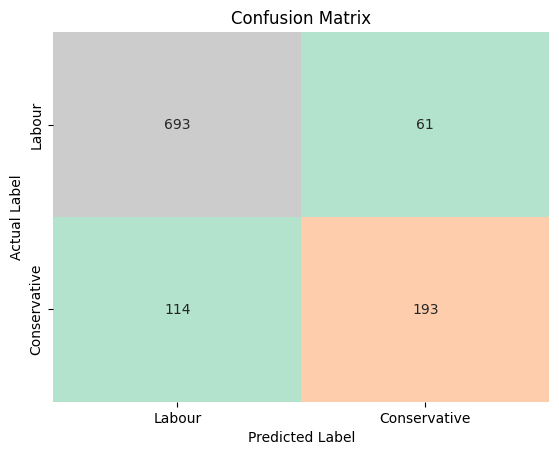

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_tlr), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


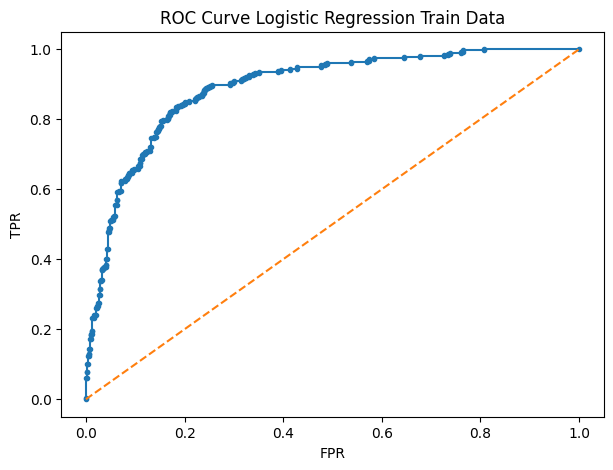

In [ ]:
Y_train_predict_prob = best_lr.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_tlr = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_tlr, 2))
fpr_train_tlr, tpr_train_tlr, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Logistic Regression Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_tlr, tpr_train_tlr, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_tlr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       303
           1       0.76      0.71      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



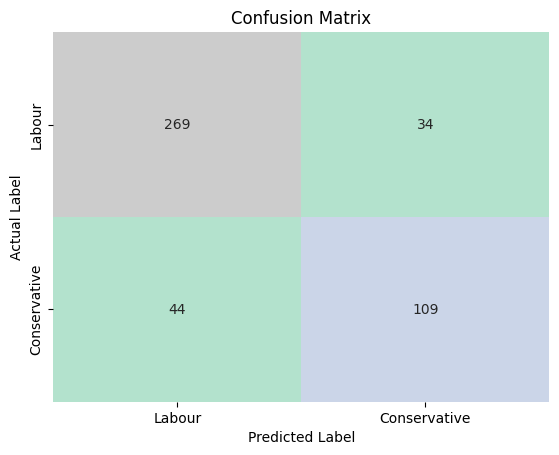

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_tlr), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.88


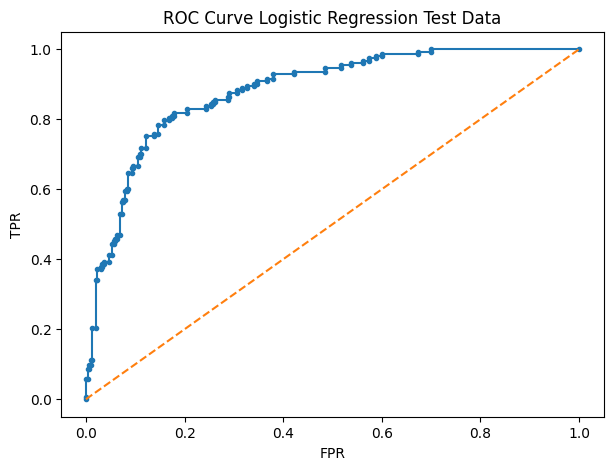

In [ ]:
Y_test_predict_prob = best_lr.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_tlr = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_tlr, 2))
fpr_test_tlr, tpr_test_tlr, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Logistic Regression Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_tlr, tpr_test_tlr, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Feature Importance**

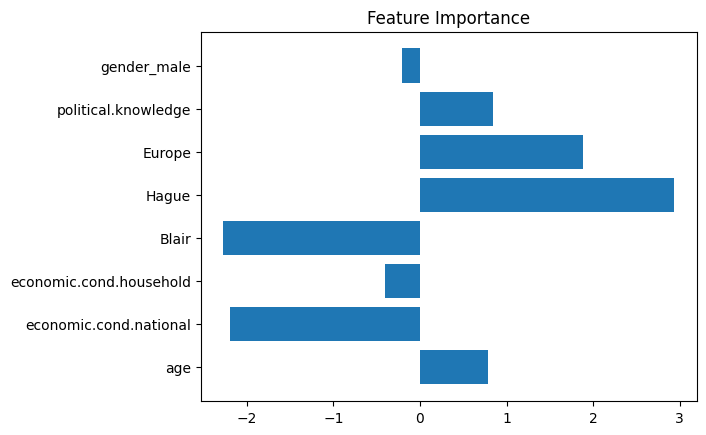

In [ ]:
plt.title('Feature Importance')
plt.barh(X_train.columns, best_lr.coef_[0]);

*  Despite tuning the model based on learning rate and solver, there is no significant impact on the model's performance.
*  The precision, recall, accuracy, and AUC of the model on both training and testing data are high and consistent, indicating no overfitting or underfitting. The model can be used for making predictions.
*  Similar to previous observations, the model demonstrates better performance for the majority class and relatively poorer performance for the minority class.
*  The four most important features for classification remain consistent: the ratings of Hague and Blair, the ratings of national economic conditions, and Eurosceptic sentiment

####LDA

In [ ]:
param_grid = {'solver': ['lsqr', 'eigen', 'svd'],
              'tol': [0.1, 0.01, 0.001],
              }
model = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

Grid Search parameters at the start

'solver': ['lsqr', 'eigen', 'svd']

'tol': [0.001, 0.0001, 0.00001]

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['lsqr', 'eigen', 'svd'],
                         'tol': [0.1, 0.01, 0.001]},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'solver': 'lsqr', 'tol': 0.1}

In [ ]:
best_lda = grid_search.best_estimator_

In [ ]:
Y_train_tlda = best_lda.predict(X_train)
Y_test_tlda = best_lr.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_tlda))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



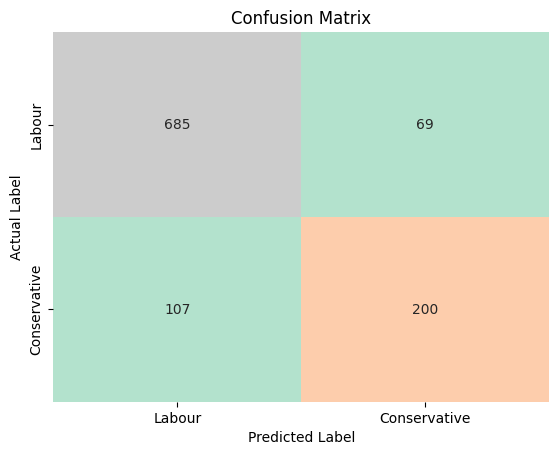

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_tlda), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


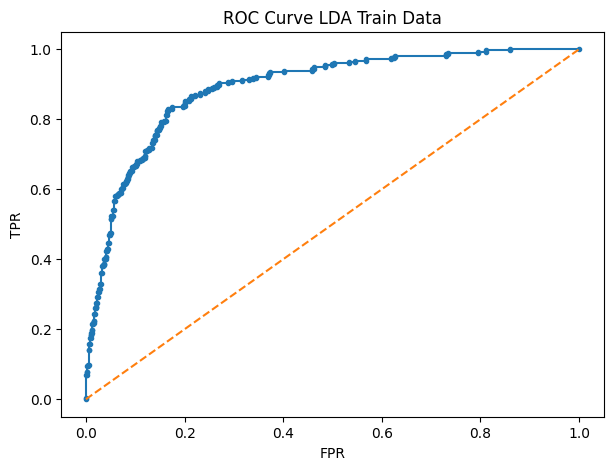

In [ ]:
Y_train_predict_prob = best_lda.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_tlda = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_tlda, 2))
fpr_train_tlda, tpr_train_tlda, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve LDA Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_tlda, tpr_train_tlda, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_tlda))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       303
           1       0.76      0.71      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



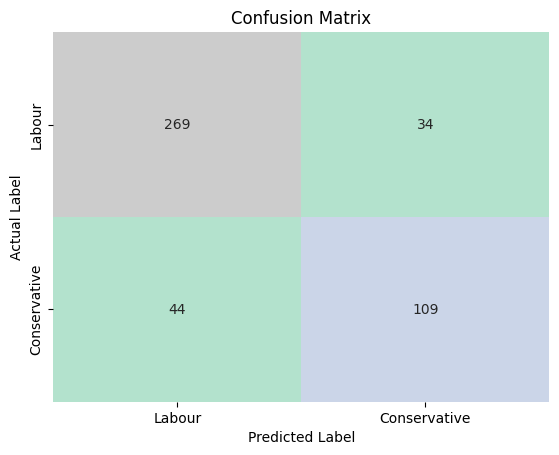

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_tlda), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


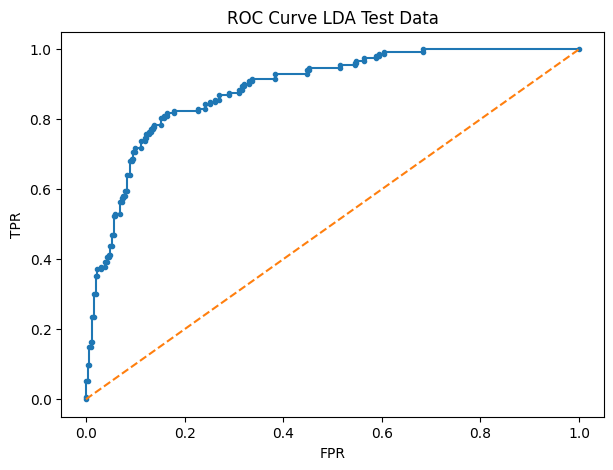

In [ ]:
Y_test_predict_prob = best_lda.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_tlda = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_tlda, 2))
fpr_test_tlda, tpr_test_tlda, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve LDA Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_tlda, tpr_test_tlda, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Feature Importance**


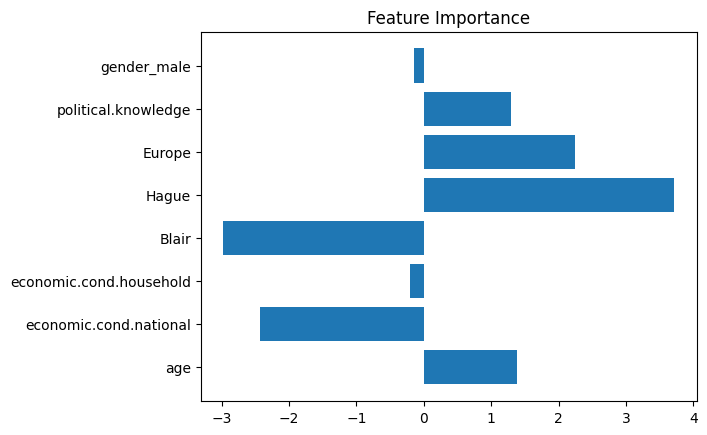

In [ ]:
plt.title('Feature Importance')
plt.barh(X_train.columns, best_lda.coef_[0]);

*  Despite tuning the model based on the learning rate and solver, there is no significant impact observed.
*  The precision, recall, accuracy, and AUC of the model on both training and testing data are high and consistent, indicating no signs of overfitting or underfitting. The model is reliable for making predictions.
*  Similar to previous findings, the model exhibits better predictions for the majority class and relatively poorer performance for the minority class.
*  The four most influential features for classification remain consistent: ratings of Hague and Blair, ratings of national economic conditions, and Eurosceptic sentiment.

####KNN

Finding the optimum k - value for both uniform weights & inverse distance weights

In [ ]:
scores_train = []
scores_test = []
for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  knn.fit(X_train, Y_train)
  scores_train.append(knn.score(X_train, Y_train))
  scores_test.append(knn.score(X_test, Y_test))

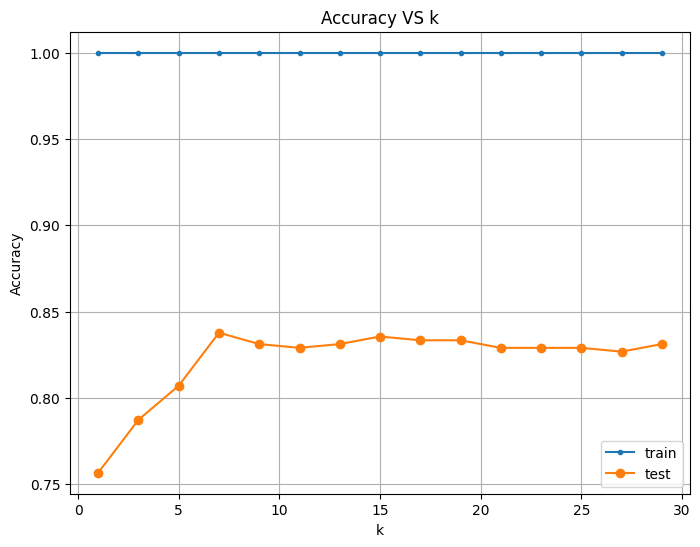

In [ ]:
plt.figure(figsize = [8, 6])
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Accuracy VS k')
plt.plot(range(1, 30, 2), scores_train, marker = '.', label = 'train')
plt.plot(range(1, 30, 2), scores_test, marker = 'o', label = 'test')
plt.legend()
plt.grid();

Obtaining overfit models for all k values when weights are given as inverse of distance (implying the nearer ones will have a higher influence)

In [ ]:
scores_train = []
scores_test = []
for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')    #uniform -> default
  knn.fit(X_train, Y_train)
  scores_train.append(knn.score(X_train, Y_train))
  scores_test.append(knn.score(X_test, Y_test))

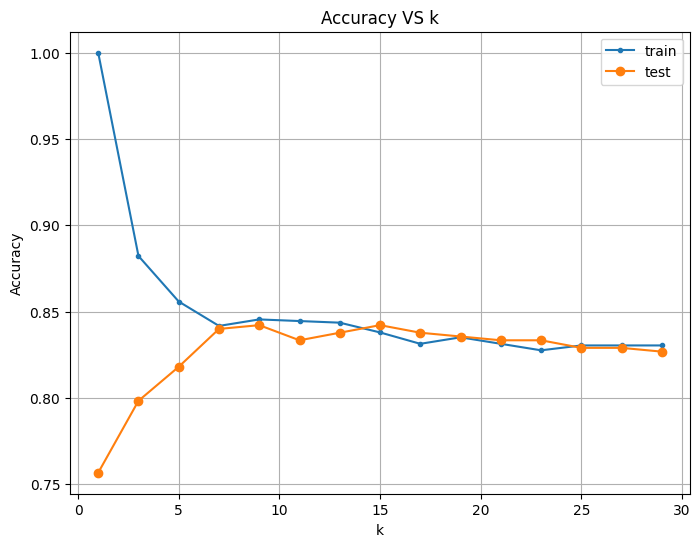

In [ ]:
plt.figure(figsize = [8, 6])
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Accuracy VS k')
plt.plot(range(1, 30, 2), scores_train, marker = '.', label = 'train')
plt.plot(range(1, 30, 2), scores_test, marker = 'o', label = 'test')
plt.legend()
plt.grid();

We feed k = 7, 9, 13, 15 to the grid to find the best fit model

In [ ]:
param_grid = {'n_neighbors': [7, 9, 13, 15]}
model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9, 13, 15]}, scoring='f1')

In [ ]:
grid_search.best_params_

{'n_neighbors': 7}

In [ ]:
best_knn = grid_search.best_estimator_

In [ ]:
Y_train_tknn = best_knn.predict(X_train)
Y_test_tknn = best_knn.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_tknn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.74      0.70      0.72       307

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



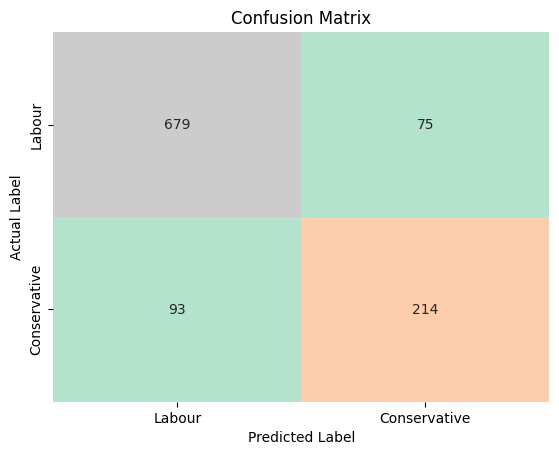

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_tknn), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.92


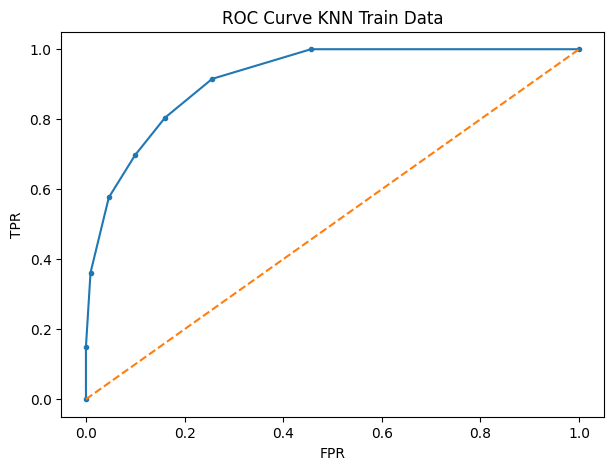

In [ ]:
Y_train_predict_prob = best_knn.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_tknn = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_tknn, 2))
fpr_train_tknn, tpr_train_tknn, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve KNN Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_tknn, tpr_train_tknn, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_tknn))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       303
           1       0.78      0.73      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



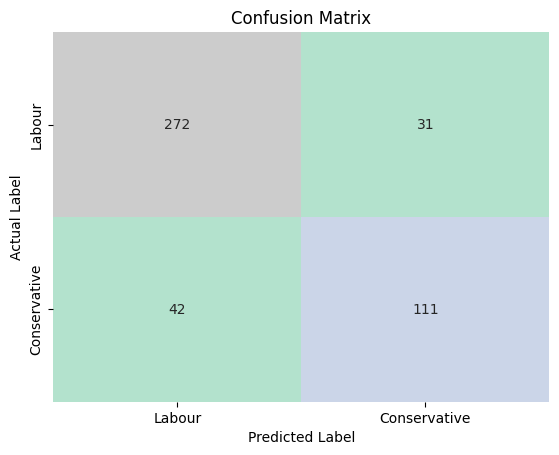

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_tknn), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.89


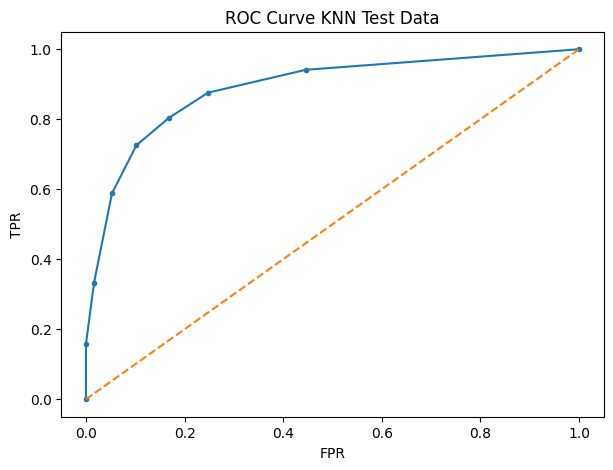

In [ ]:
Y_test_predict_prob = best_knn.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_tknn = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_tknn, 2))
fpr_test_tknn, tpr_test_tknn, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve KNN Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_tknn, tpr_test_tknn, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

*  The precision, recall, accuracy, and AUC of the K-nearest neighbors (KNN) algorithm on both training and testing data are high and consistent, indicating no signs of overfitting or underfitting. The KNN algorithm is suitable for making predictions.
*  Comparing with previous models, the KNN algorithm slightly outperforms in terms of accuracy and has the best F1-score for the minority class among the models evaluated. However, it still exhibits a slightly inferior performance for the minority class.

###Bagging Classifier (Random Forest)

In [ ]:
param_grid = {'max_depth': [8, 9, 10],
              'max_features': [2, 3, 4],
              'min_samples_leaf': [5, 10, 15],
              'min_samples_split': [15, 30, 45],
              'n_estimators': [101, 301, 501],
              'class_weight': [{0: 1, 1: 2}, {1: 1, 0: 2.5}]
              }
model = RandomForestClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1')

'max_depth': [7, 9, 11]

'max_features': [3, 4, 5, 6] => sqrt(n)

'min_samples_leaf': [10, 15, 20] => 1-3% of Total No. of records

'min_samples_split': [30, 45, 60] => 3 * min_samples_leaf

'n_estimators': [101, 301, 501]

'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 1.5}, {0: 1, 1: 2}, {0: 1, 1: 2.5}] => Count of Labour/ Count of conservative = 2.3

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 2.5, 1: 1}],
                         'max_depth': [8, 9, 10], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [101, 301, 501]},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'class_weight': {0: 1, 1: 2},
 'max_depth': 9,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 101}

In [ ]:
rf = grid_search.best_estimator_

In [ ]:
Y_train_rf = rf.predict(X_train)
Y_test_rf = rf.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_rf))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       754
           1       0.72      0.82      0.77       307

    accuracy                           0.86      1061
   macro avg       0.82      0.84      0.83      1061
weighted avg       0.86      0.86      0.86      1061



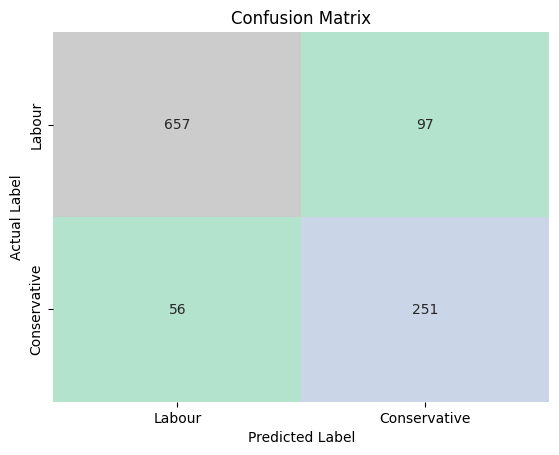

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_rf), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.93


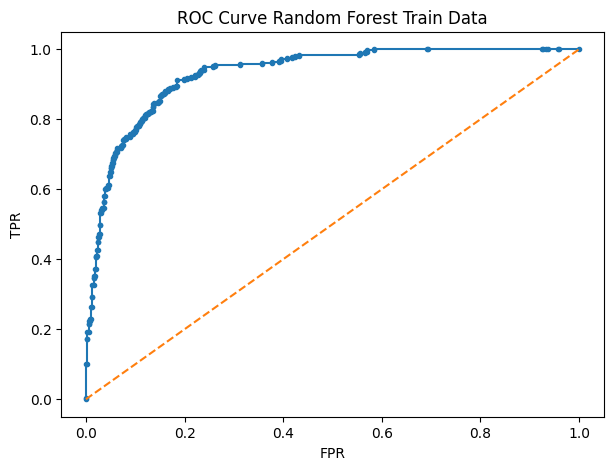

In [ ]:
Y_train_predict_prob = rf.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_rf = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_rf, 2))
fpr_train_rf, tpr_train_rf, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Random Forest Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_rf, tpr_train_rf, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_rf))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       303
           1       0.72      0.79      0.76       153

    accuracy                           0.83       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.83      0.83      0.83       456



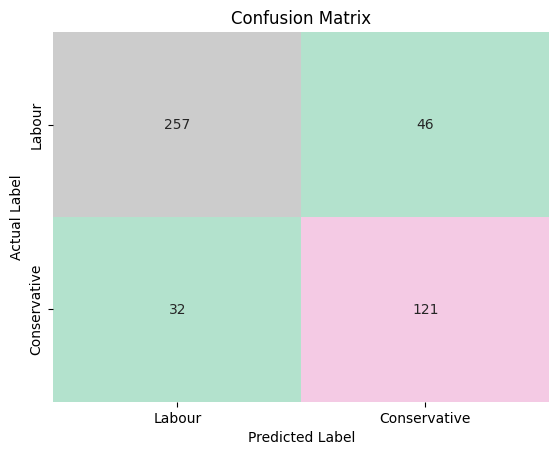

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_rf), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.9


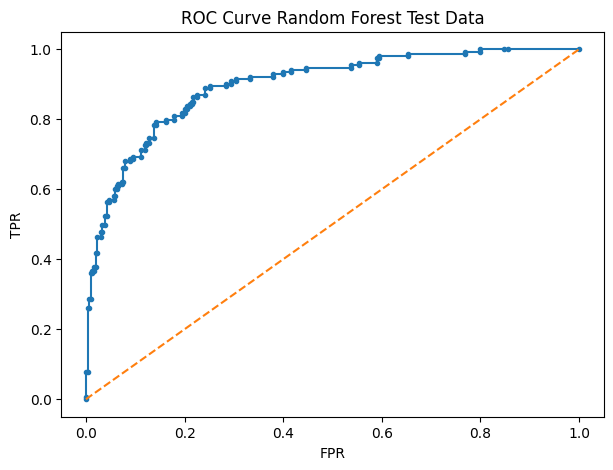

In [ ]:
Y_test_predict_prob = rf.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_rf = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_rf, 2))
fpr_test_rf, tpr_test_rf, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Random Forest Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_rf, tpr_test_rf, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Feature Importance**

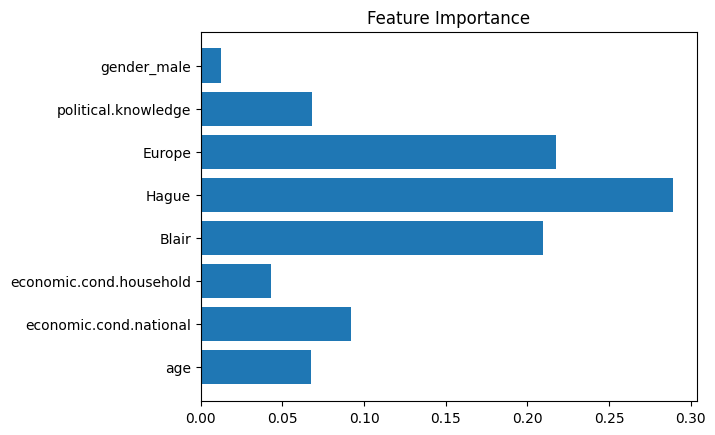

In [ ]:
plt.title('Feature Importance')
plt.barh(X_train.columns, rf.feature_importances_);

*  The precision, recall, accuracy, and AUC of the model on both training and testing data are high and consistent, indicating no overfitting or underfitting. The model is suitable for making predictions.
*  Similar to previous models, the model demonstrates better predictions for the majority class and slightly inferior performance for the minority class. However, it exhibits a slightly better prediction for the minority class compared to the preceding models.
*  The ratings of the prime ministerial candidates and Eurosceptic sentiment are the most important features for classification.





###Boosting

We'll use the default simple model as base estimator for both the boosting techniques.

####AdaBoost

In [ ]:
param_grid = {'n_estimators': [21, 51, 101]}
model = AdaBoostClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'n_estimators': [21, 51, 101]}, scoring='f1')

In [ ]:
grid_search.best_params_

{'n_estimators': 21}

In [ ]:
abcl = grid_search.best_estimator_

In [ ]:
Y_train_ab = abcl.predict(X_train)
Y_test_ab = abcl.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_ab))

              precision    recall  f1-score   support

           0       0.88      0.92      0.89       754
           1       0.77      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



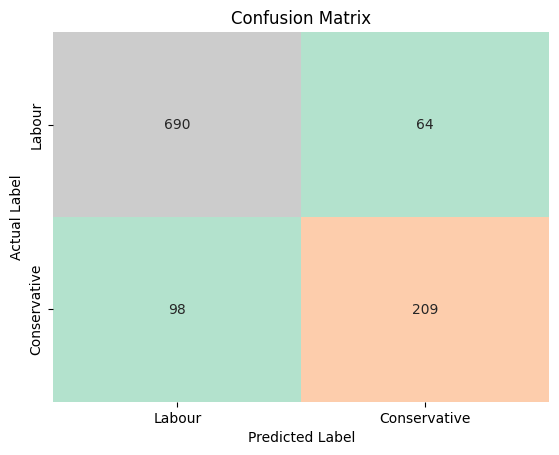

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_ab), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.91


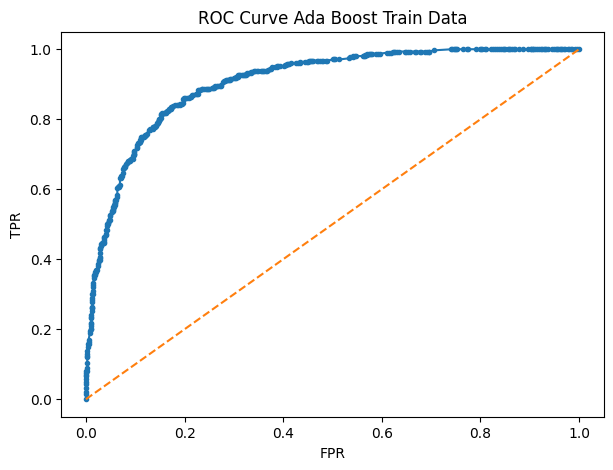

In [ ]:
Y_train_predict_prob = abcl.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_ab = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_ab, 2))
fpr_train_ab, tpr_train_ab, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Ada Boost Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_ab, tpr_train_ab, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_ab))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.71      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



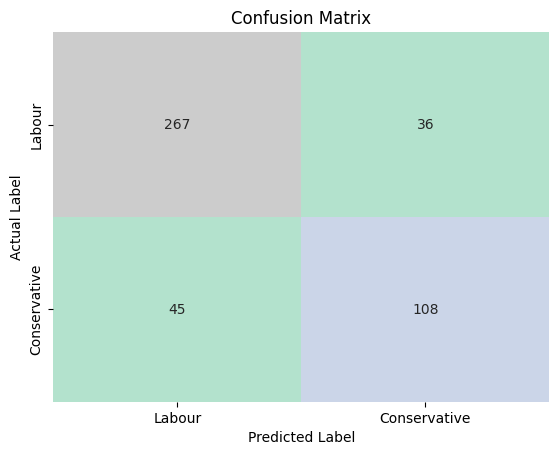

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_ab), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.88


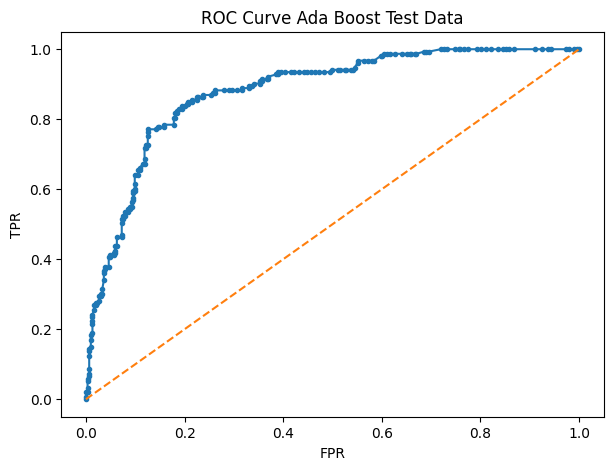

In [ ]:
Y_test_predict_prob = abcl.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_ab = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_ab, 2))
fpr_test_ab, tpr_test_ab, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Ada Boost Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_ab, tpr_test_ab, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

*  The precision, recall, accuracy, and AUC of the model on both training and testing data are high and consistent, indicating no signs of overfitting or underfitting. The model is suitable for making predictions.
*  Similar to other models, the model shows better predictions for the majority class and relatively poorer performance for the minority class.

####Gradient Boost

In [ ]:
param_grid = {'n_estimators': [21, 51, 101]}
model = GradientBoostingClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'n_estimators': [21, 51, 101]}, scoring='f1')

In [ ]:
grid_search.best_params_

{'n_estimators': 51}

In [ ]:
gbcl = grid_search.best_estimator_

In [ ]:
Y_train_gb = gbcl.predict(X_train)
Y_test_gb = gbcl.predict(X_test)

**Model Evaluation - Train**

In [ ]:
print(classification_report(Y_train, Y_train_gb))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       754
           1       0.83      0.74      0.78       307

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



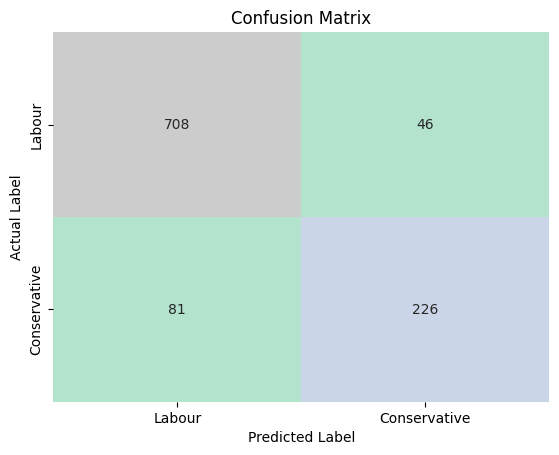

In [ ]:
sns.heatmap(confusion_matrix(Y_train, Y_train_gb), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.94


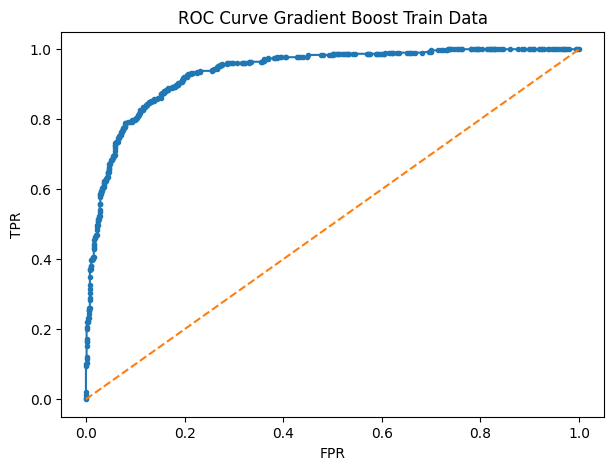

In [ ]:
Y_train_predict_prob = gbcl.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_gb = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_gb, 2))
fpr_train_gb, tpr_train_gb, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Gradient Boost Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_gb, tpr_train_gb, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

**Model Evaluation - Test**

In [ ]:
print(classification_report(Y_test, Y_test_gb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.79      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



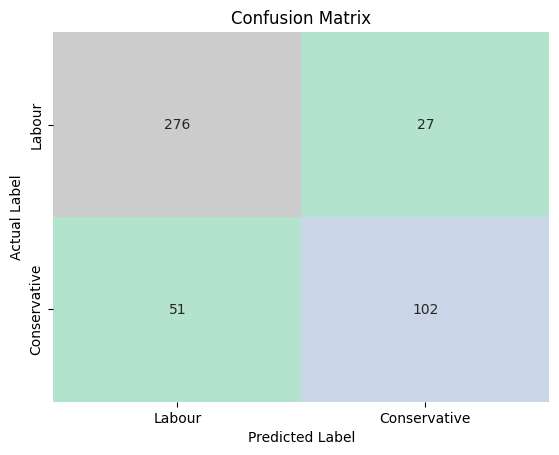

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_test_gb), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.9


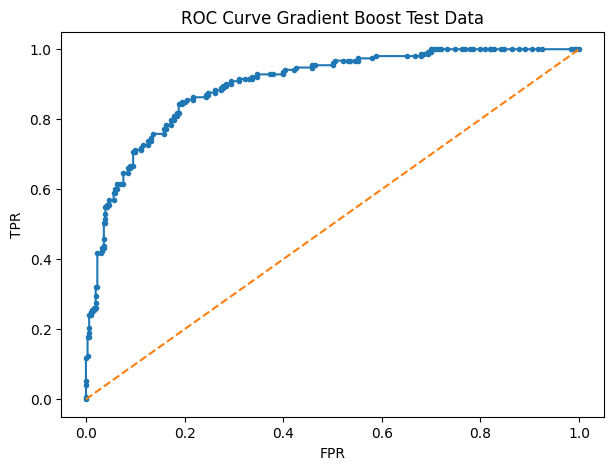

In [ ]:
Y_test_predict_prob = gbcl.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_gb = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_gb, 2))
fpr_test_gb, tpr_test_gb, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Gradient Boost Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_gb, tpr_test_gb, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

*  The precision, recall, accuracy, and AUC of the model on both training and testing data are high and consistent, indicating no signs of overfitting or underfitting. The model is suitable for making predictions.
*  Similar to other models, the model demonstrates better predictions for the majority class and relatively poorer performance for the minority class.





1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report

Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures.

Comment on the final model.

###Model Comparisons

In [ ]:
model_names = ['Logistic Regression', 'LDA', 'Naive Bayes', 'KNN', 'Bagging (RF)', 'Ada Boost', 'Gradient Boost']

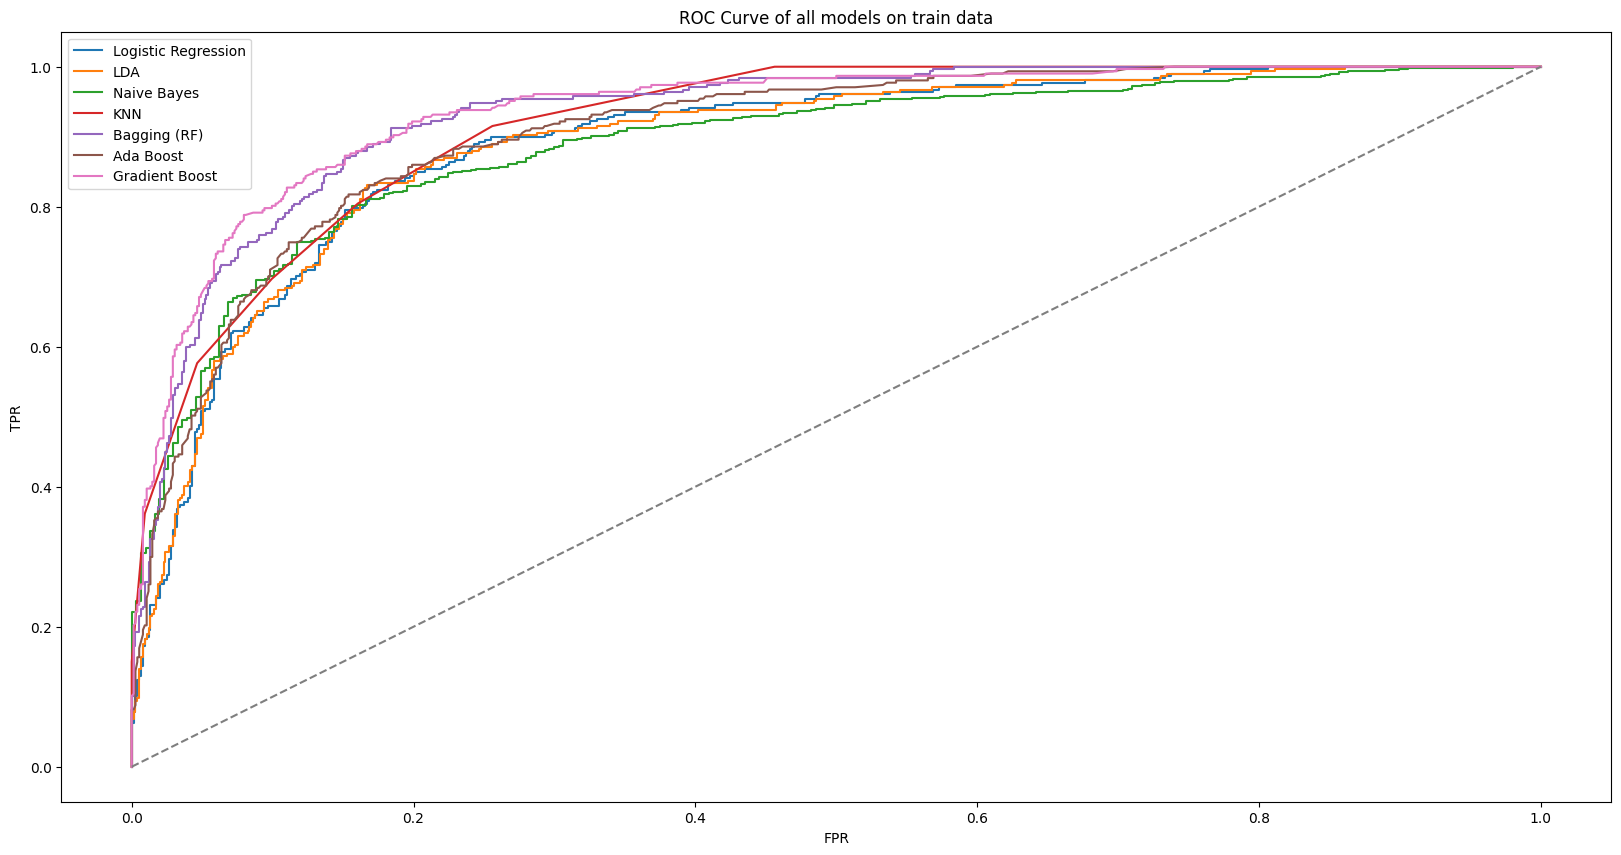

In [ ]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on train data')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_train_tlr, tpr_train_tlr)
plt.plot(fpr_train_tlda, tpr_train_tlda)
plt.plot(fpr_train_gnb, tpr_train_gnb)
plt.plot(fpr_train_tknn, tpr_train_tknn)
plt.plot(fpr_train_rf, tpr_train_rf)
plt.plot(fpr_train_ab, tpr_train_ab)
plt.plot(fpr_train_gb, tpr_train_gb)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

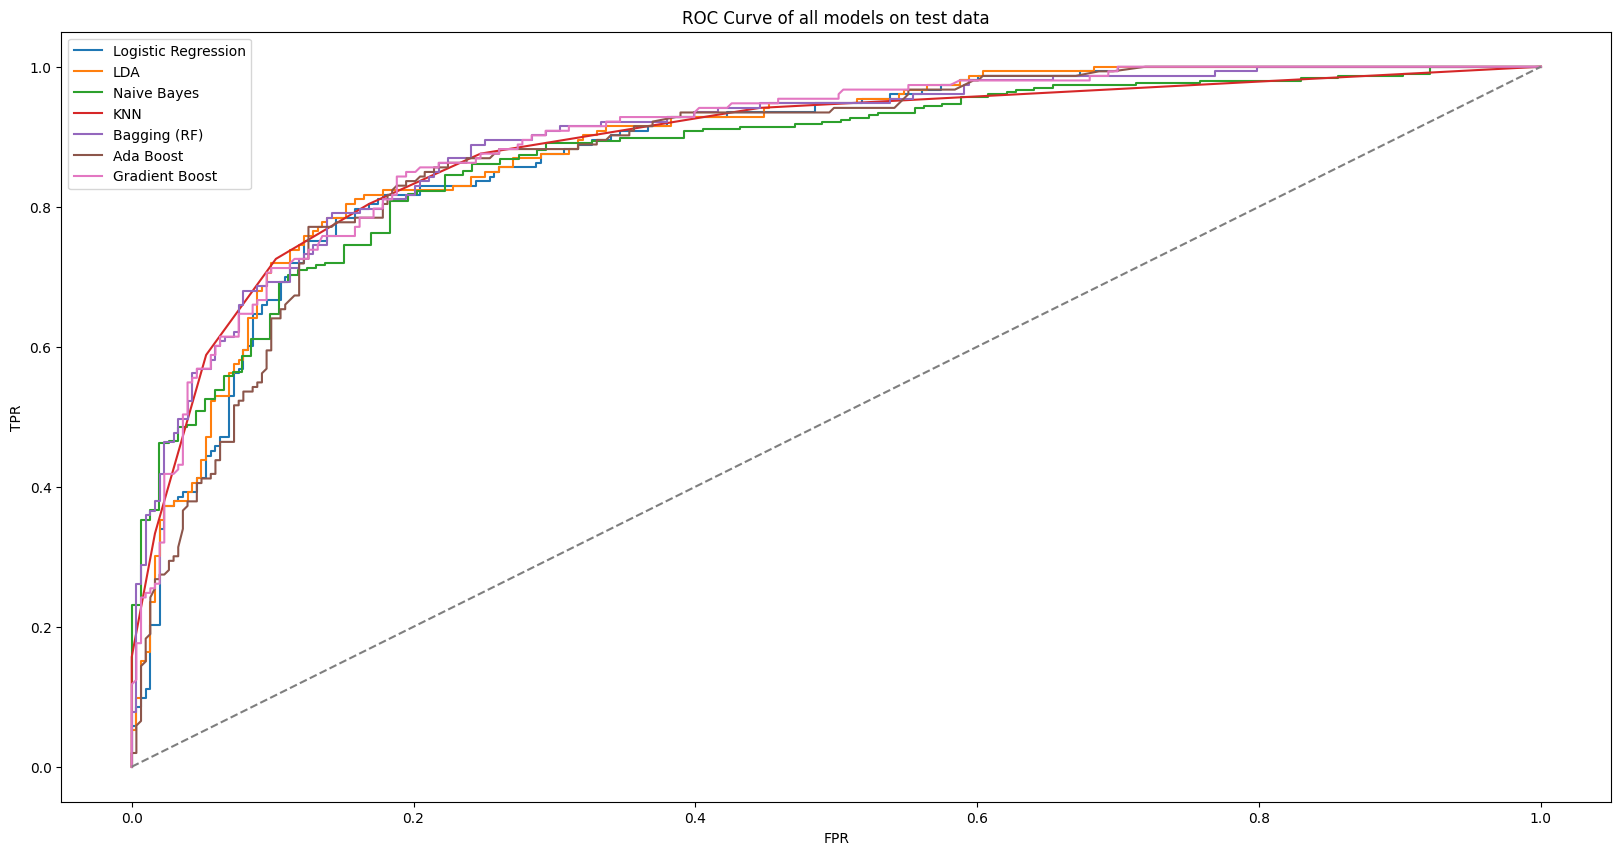

In [ ]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on test data')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_test_tlr, tpr_test_tlr)
plt.plot(fpr_test_tlda, tpr_test_tlda)
plt.plot(fpr_test_gnb, tpr_test_gnb)
plt.plot(fpr_test_tknn, tpr_test_tknn)
plt.plot(fpr_test_rf, tpr_test_rf)
plt.plot(fpr_test_ab, tpr_test_ab)
plt.plot(fpr_test_gb, tpr_test_gb)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

Since Gaussian Naive Bayes is the only model selected prior to custom encoding the Y (vote) variable, it is recommended to encode the predicted labels obtained from the Gaussian Naive Bayes model for further comparison with other models.





In [ ]:
for i, label in enumerate(Y_train_gnb):
  if label == 'Conservative':
    Y_train_gnb[i] = 1
  else:
    Y_train_gnb[i] = 0
Y_train_gnb = Y_train_gnb.astype('int64')

for i, label in enumerate(Y_test_gnb):
  if label == 'Conservative':
    Y_test_gnb[i] = 1
  else:
    Y_test_gnb[i] = 0
Y_test_gnb = Y_test_gnb.astype('int64')

In [ ]:
f1_train_conservative = [f1_score(Y_train, Y_train_tlr), f1_score(Y_train, Y_train_tlda), f1_score(Y_train, Y_train_gnb), f1_score(Y_train, Y_train_tknn),
                         f1_score(Y_train, Y_train_rf), f1_score(Y_train, Y_train_ab), f1_score(Y_train, Y_train_gb)]

f1_test_conservative = [f1_score(Y_test, Y_test_tlr), f1_score(Y_test, Y_test_tlda), f1_score(Y_test, Y_test_gnb), f1_score(Y_test, Y_test_tknn),
                        f1_score(Y_test, Y_test_rf), f1_score(Y_test, Y_test_ab), f1_score(Y_test, Y_test_gb)]

f1_train_labour = [f1_score(Y_train, Y_train_tlr, pos_label = 0), f1_score(Y_train, Y_train_tlda, pos_label = 0), f1_score(Y_train, Y_train_gnb, pos_label = 0),
                  f1_score(Y_train, Y_train_tknn, pos_label = 0), f1_score(Y_train, Y_train_rf, pos_label = 0), f1_score(Y_train, Y_train_ab, pos_label = 0),
                  f1_score(Y_train, Y_train_gb, pos_label = 0)]

f1_test_labour = [f1_score(Y_test, Y_test_tlr, pos_label = 0), f1_score(Y_test, Y_test_tlda, pos_label = 0), f1_score(Y_test, Y_test_gnb, pos_label = 0),
                  f1_score(Y_test, Y_test_tknn, pos_label = 0), f1_score(Y_test, Y_test_rf, pos_label = 0), f1_score(Y_test, Y_test_ab, pos_label = 0),
                  f1_score(Y_test, Y_test_gb, pos_label = 0)]

accuracy_train = [best_lr.score(X_train, Y_train), best_lda.score(X_train, Y_train), accuracy_score(Y_train, Y_train_gnb), best_knn.score(X_train, Y_train),
                  rf.score(X_train, Y_train), abcl.score(X_train, Y_train), gbcl.score(X_train, Y_train)]

accuracy_test = [best_lr.score(X_test, Y_test), best_lda.score(X_test, Y_test), accuracy_score(Y_test, Y_test_gnb), best_knn.score(X_test, Y_test),
                 rf.score(X_test, Y_test),abcl.score(X_test, Y_test), gbcl.score(X_test, Y_test)]

auc_train = [auc_train_tlr, auc_train_tlda, auc_train_gnb, auc_train_tknn, auc_train_rf, auc_train_ab, auc_train_gb]

auc_test = [auc_test_tlr, auc_test_tlda, auc_test_gnb, auc_test_tknn, auc_test_rf, auc_test_ab, auc_test_gb]

In [ ]:
model_metrics = round(pd.DataFrame({'f1_train_conservative': f1_train_conservative, 'f1_test_conservative': f1_test_conservative, 'f1_train_labour': f1_train_labour,
              'f1_test_labour': f1_train_labour, 'Accuracy_train': accuracy_train, 'Accuracy_test': accuracy_test, 'AUC_train': auc_train, 'AUC_test': auc_test},
               index = model_names) * 100, 2)
model_metrics

,f1_train_conservative,f1_test_conservative,f1_train_labour,f1_test_labour,Accuracy_train,Accuracy_test,AUC_train,AUC_test
Logistic Regression,68.81,73.65,88.79,88.79,83.51,82.89,89.02,88.18
LDA,69.44,73.65,88.62,88.62,83.41,83.33,88.94,88.76
Naive Bayes,70.69,73.44,88.52,88.52,83.51,82.24,88.79,87.64
KNN,71.81,75.25,88.99,88.99,84.17,83.99,91.70,88.83
Bagging (RF),76.64,75.62,89.57,89.57,85.58,82.89,93.03,89.68
Ada Boost,72.07,72.73,89.49,89.49,84.73,82.24,90.54,87.98
Gradient Boost,78.07,72.34,91.77,91.77,88.03,82.89,93.55,89.67


In [ ]:
model_metrics_test = model_metrics[model_metrics.columns[model_metrics.columns.str.contains('test')]] #Test data model metrics
model_metrics_test['f1_test_diff'] = model_metrics_test['f1_test_conservative'] - model_metrics_test['f1_test_labour']
model_metrics_test

,f1_test_conservative,f1_test_labour,Accuracy_test,AUC_test,f1_test_diff
Logistic Regression,73.65,88.79,82.89,88.18,-15.14
LDA,73.65,88.62,83.33,88.76,-14.97
Naive Bayes,73.44,88.52,82.24,87.64,-15.08
KNN,75.25,88.99,83.99,88.83,-13.74
Bagging (RF),75.62,89.57,82.89,89.68,-13.95
Ada Boost,72.73,89.49,82.24,87.98,-16.76
Gradient Boost,72.34,91.77,82.89,89.67,-19.43


In [ ]:
print('Highest Metric Models\n')
for i in model_metrics_test.columns:
  print(i.replace('_test', ''), '-', model_metrics_test[i].sort_values(ascending = False).head().index.values[0:2])

Highest Metric Models

f1_conservative - ['Bagging (RF)' 'KNN']
f1_labour - ['Gradient Boost' 'Bagging (RF)']
Accuracy - ['KNN' 'LDA']
AUC - ['Bagging (RF)' 'Gradient Boost']
f1_diff - ['KNN' 'Bagging (RF)']


*  Performance metrics of all models are similar.
*  High accuracy and AUC scores are observed for the majority class (Labour).
*  Slightly lower performance is observed for the minority class (Conservative) across all models.
*  Random Forest model shows slightly better performance in predicting the minority class.





* Final Model : RandomForestClassifier(class_weight = {0: 1, 1: 2}, max_depth = 9, max_features = 2, min_samples_leaf = 5, min_samples_split = 30, n_estimators = 101, random_state = 1)

Assuming the sample is a correct representation of population

In [ ]:
#actual vs predicted
Y_compare = pd.DataFrame({'Actual': np.hstack((Y_train, Y_test)), 'Predicted': np.hstack((Y_train_rf, Y_test_rf))})
Y_sum = pd.DataFrame({'Labour': [(Y_compare['Actual'] == 0).sum(), (Y_compare['Predicted'] == 0).sum()],
                      'Conservative': [(Y_compare['Actual'] == 1).sum(), (Y_compare['Predicted'] == 1).sum()]}, index = ['Actual', 'Predicted'])

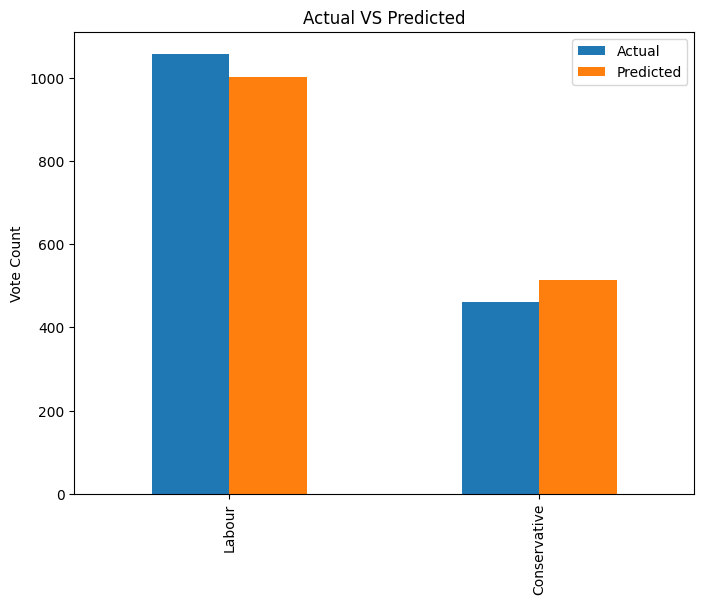

In [ ]:
Y_sum.T.plot.bar(figsize = [8, 6]);
plt.title('Actual VS Predicted')
plt.ylabel('Vote Count');

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total.

Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

**Insights**
* All the models have performed fairly well and have approximately similar performance metrics after tuning.
* Random Forest is slightly better as it performs slightly better in predicting the minority class as compared to other models. The Random Forest model predicts a slightly higher number of votes for conservatives & slightly lower number of votes for Labour. This might help in adjusting for the bias in sampling using class weights parameter.
* Labour is getting twice the number of votes as compared to conservatives. Thus, Labour is most likely to come back to power.
* The most important features in classifying are -: The ratings of each of the candidate, Eurosceptic sentiments, followed by the rating of national economic condition, age & political knowledge of their parties position.
* Gender plays no significant role in the classification process but is important to ascertain whether the survey is unbiased.
People who have higher Eurosceptic sentiment, have voted for the conservative party.
* Young to middle aged voters (< 50 yrs of age) seem more inclined to vote for labour party, whereas people beyond 60 yrs of age prefer to vote for the conservative party.
* People are generally happy with the national & household economic conditions with nearly 80% voting it fair to very good and naturally have chosen labour to continue.


**Recommendations:**

* We can drop the gender variable since it has the least feature importance and after ensuring the survey is not biased.
* Consider adding additional variables such as constituency/region, level of education, religion, race, immigrant status, etc., to enhance the predictive power of the model.
* Including constituency/region data can help in clustering votes based on geographical areas and enable predicting the range (confidence interval) of the number of seats each party is likely to win.
* If possible, gather more data points to further evaluate and improve the model's performance.




